In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

import sys
sys.path.append('/../../temp_prog/')
import vb_epsilon_sweeper as vs
import tur_calculator as tc
import plotting_machine as pm

c:\../../temp_prog\tur_calculator.py:28: RuntimeWarning: invalid value encountered in divide
  sigma = P_TUR*(1/T_COLD)*(eff_carnot-eff)/eff


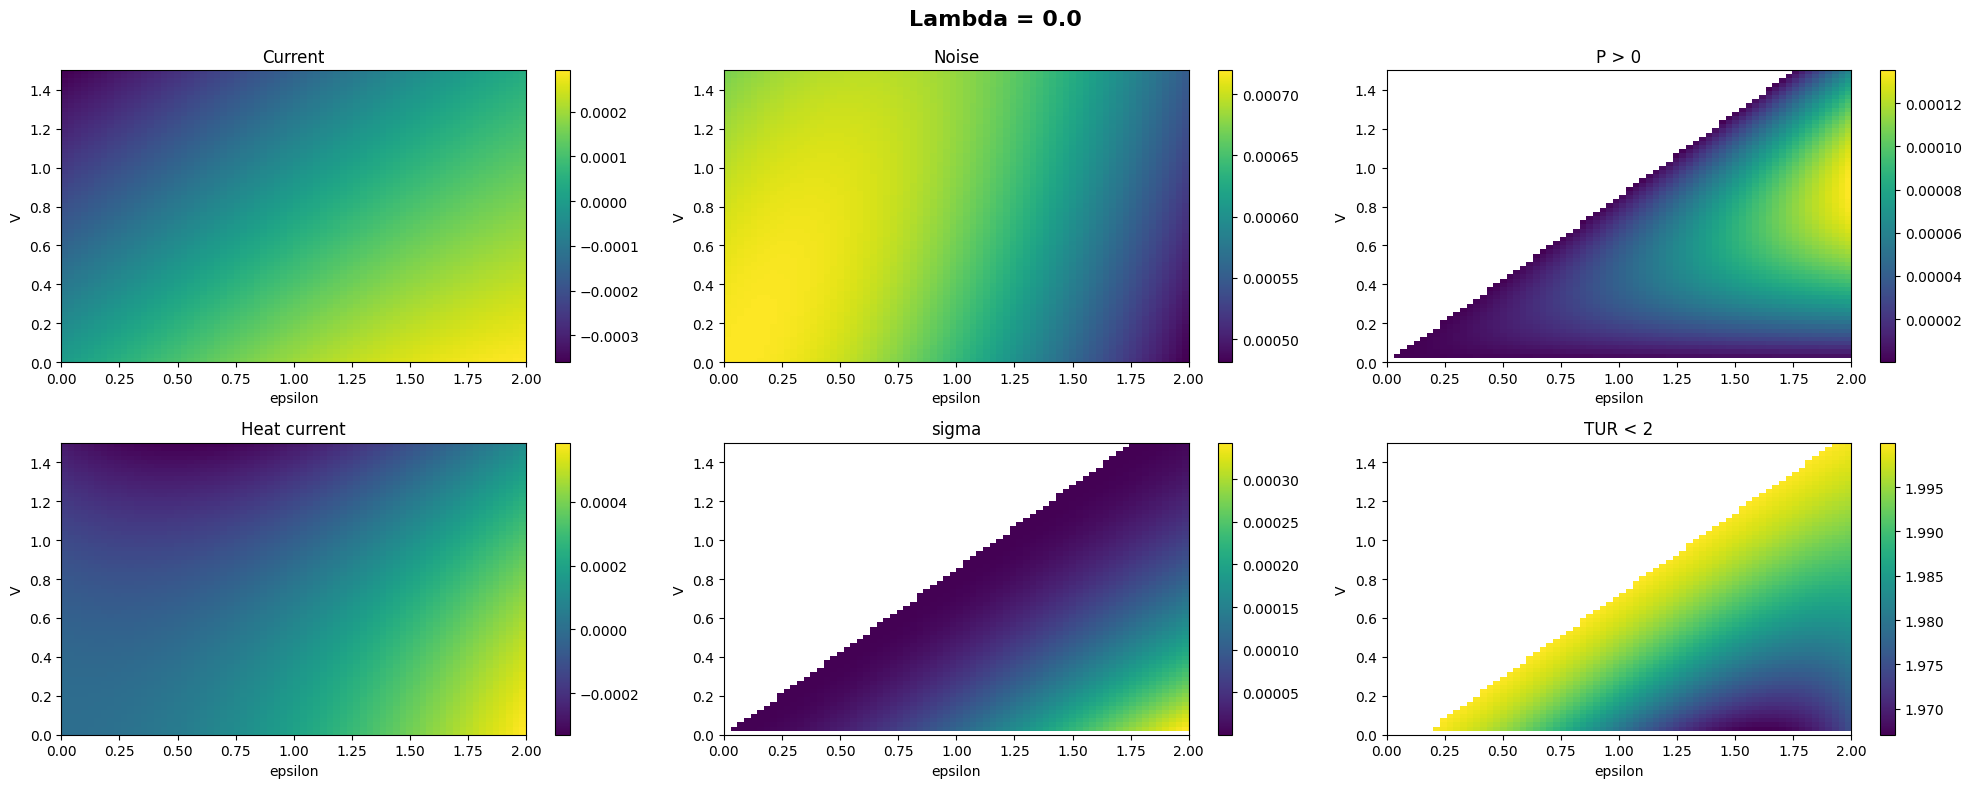

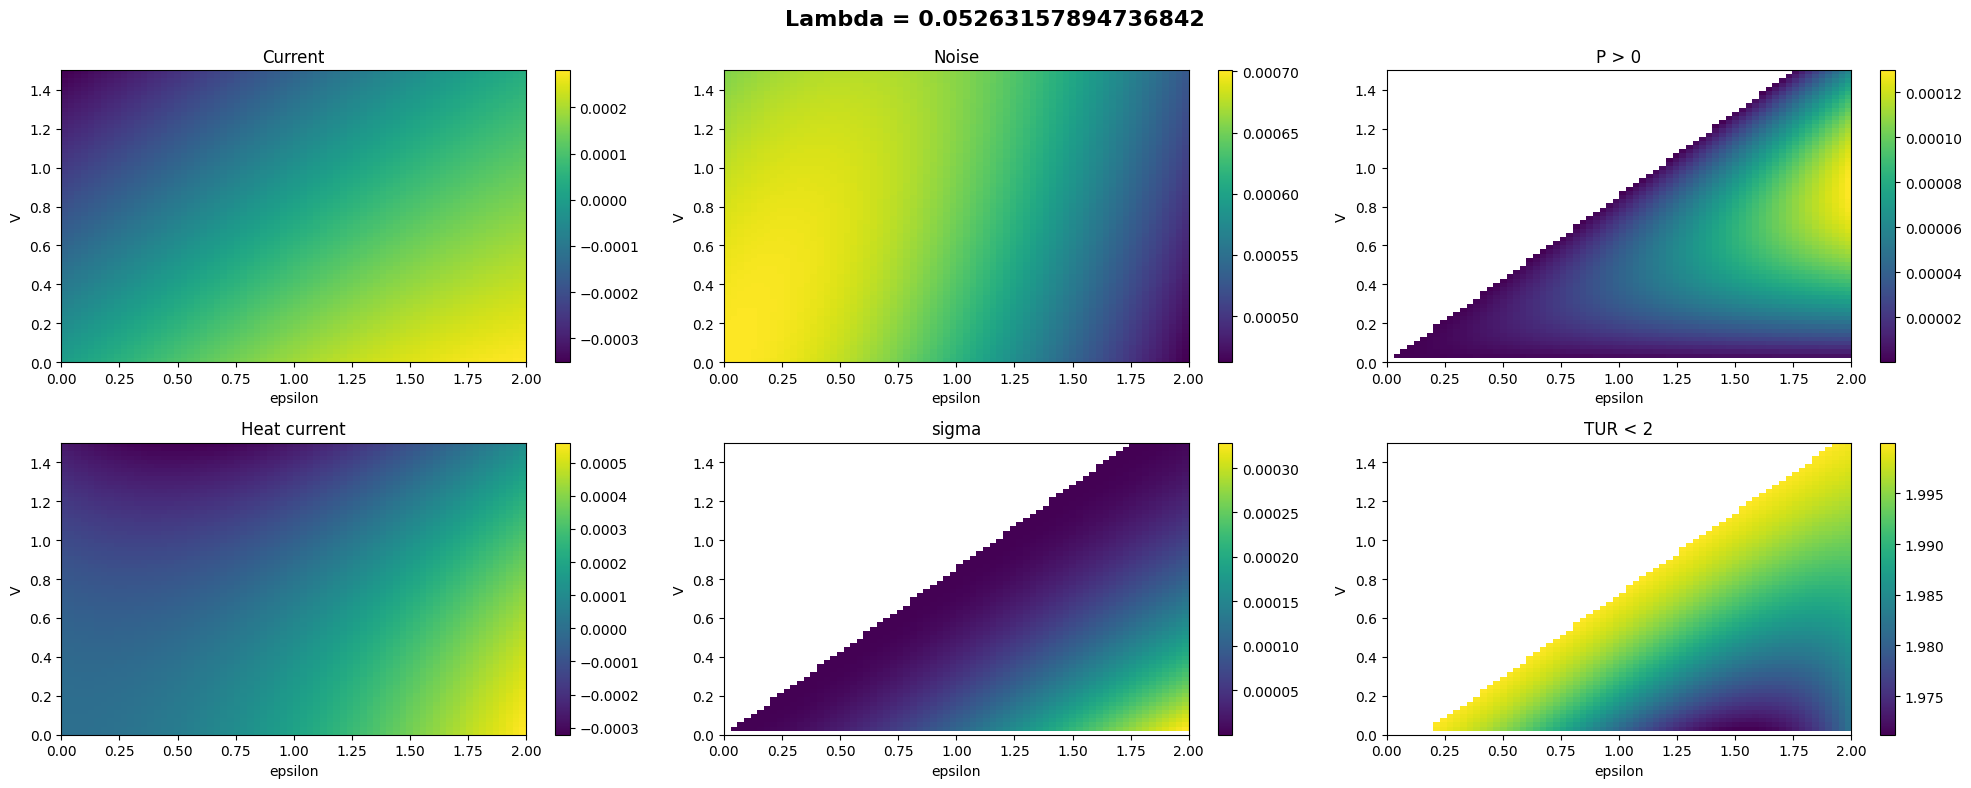

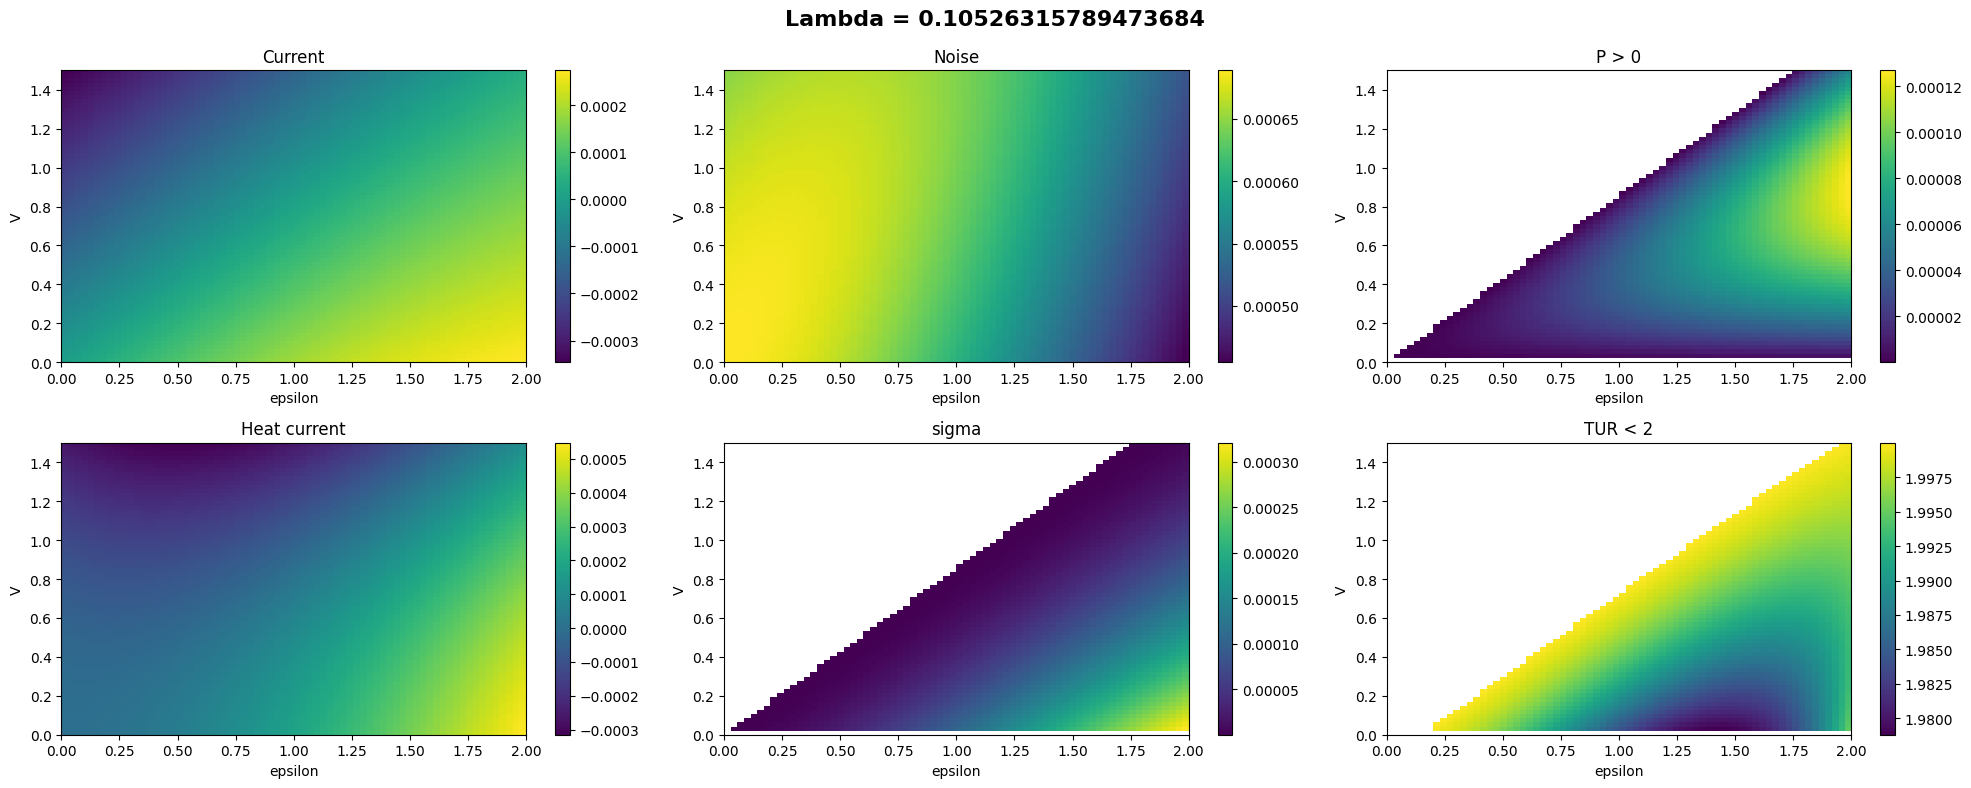

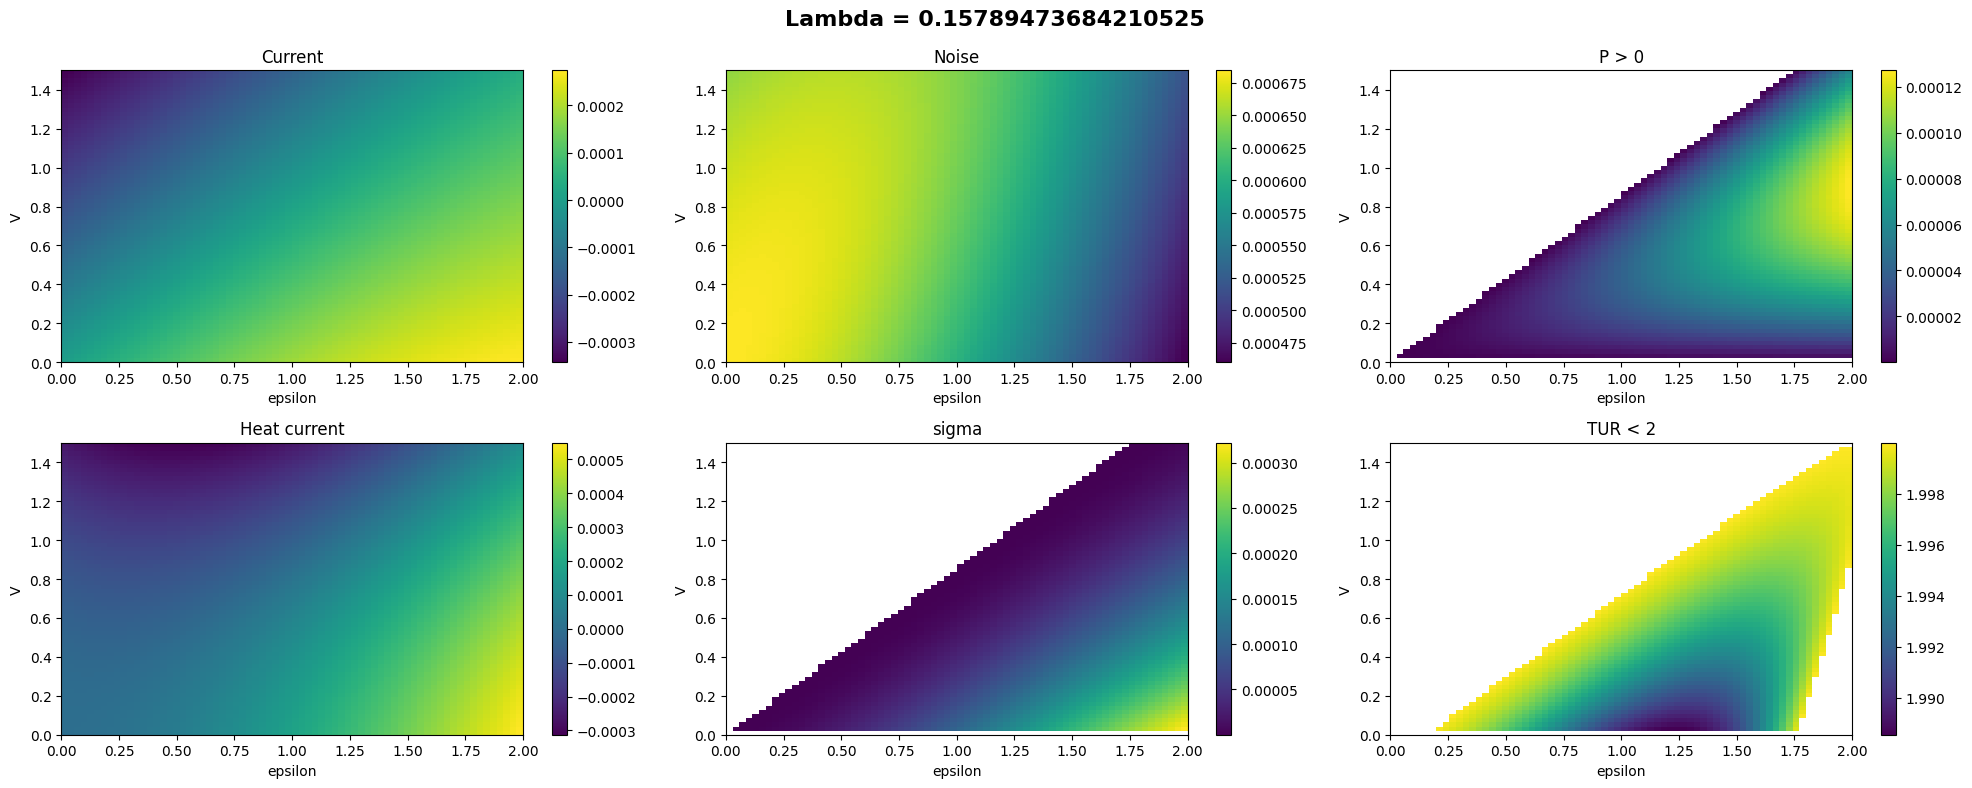

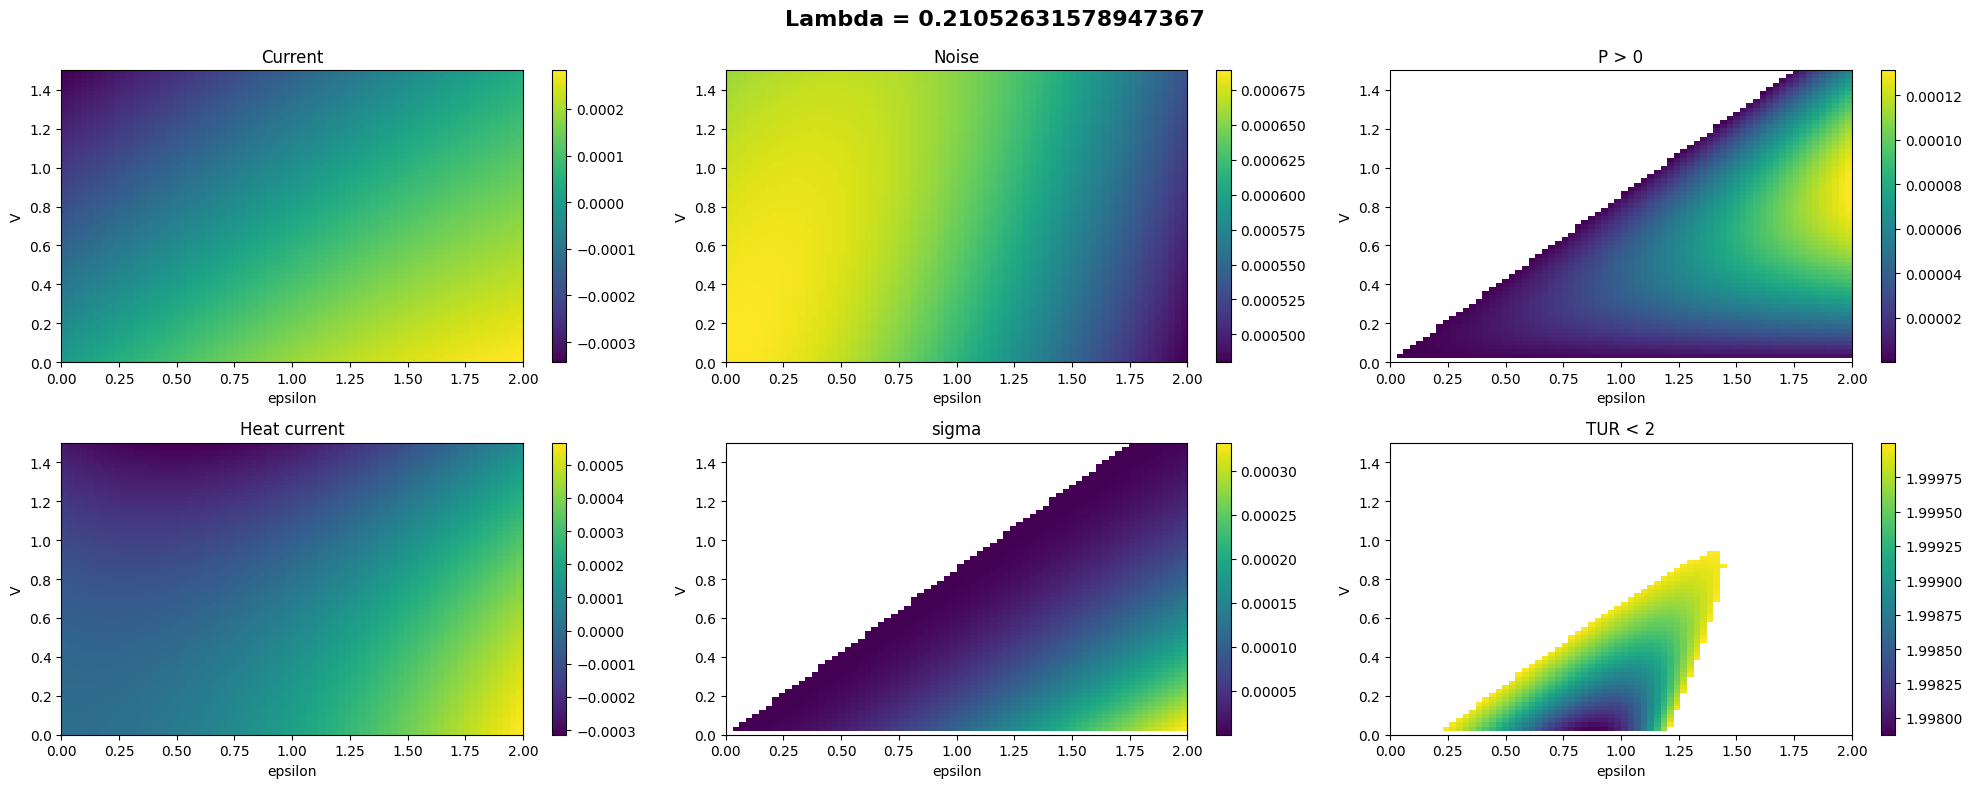

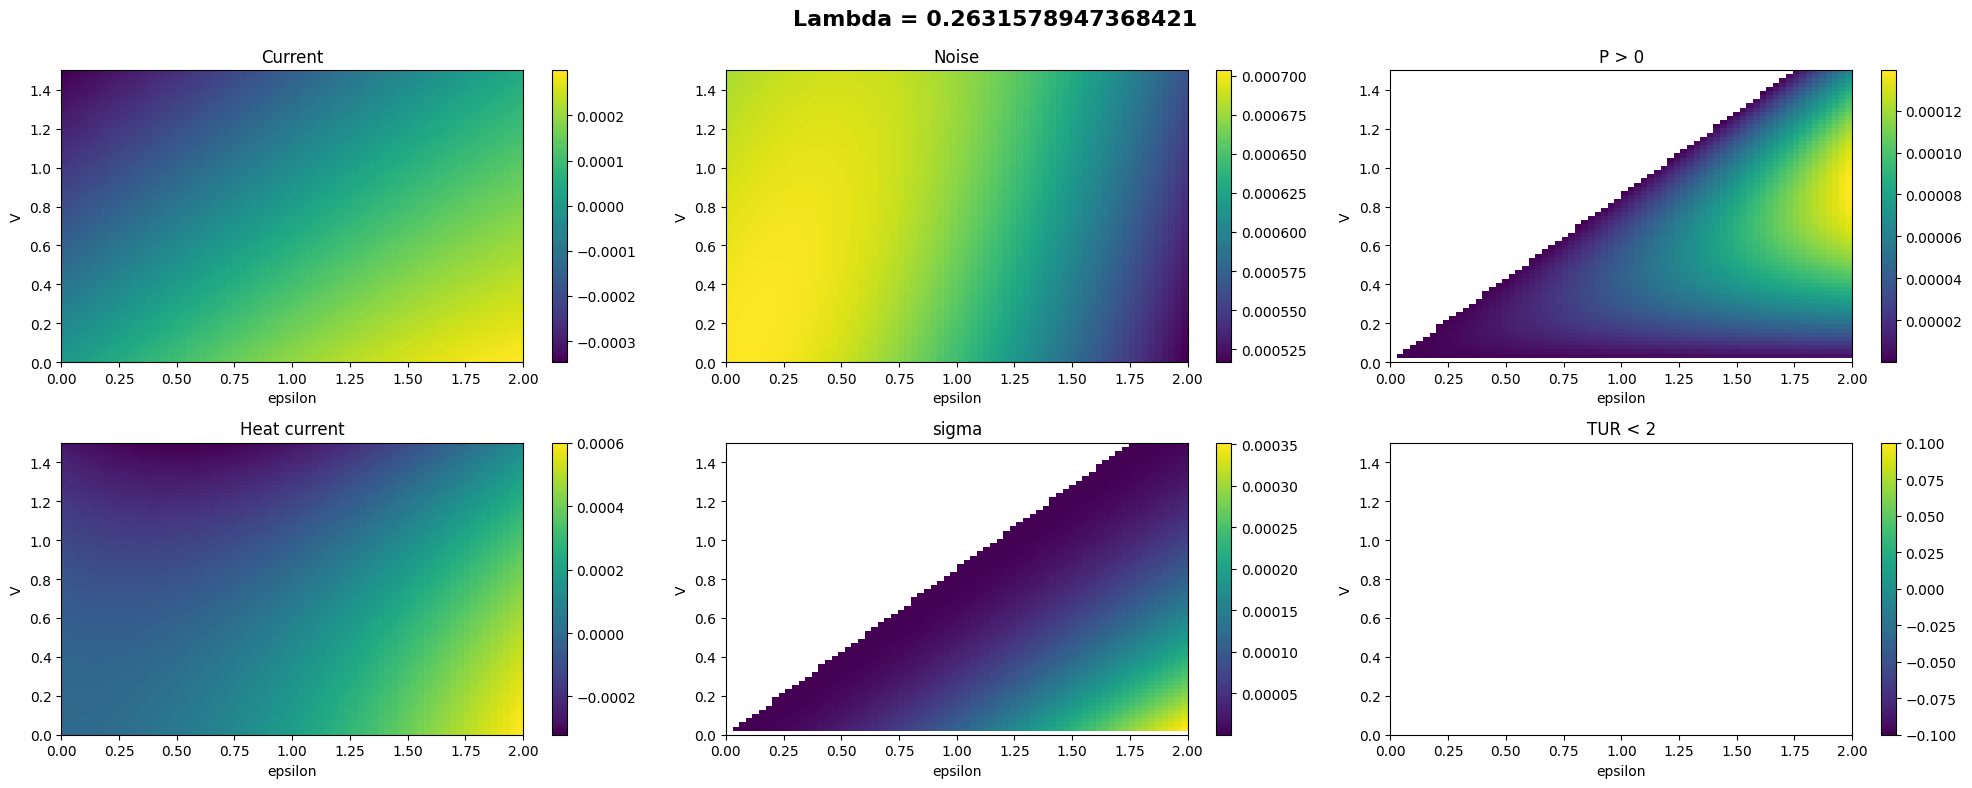

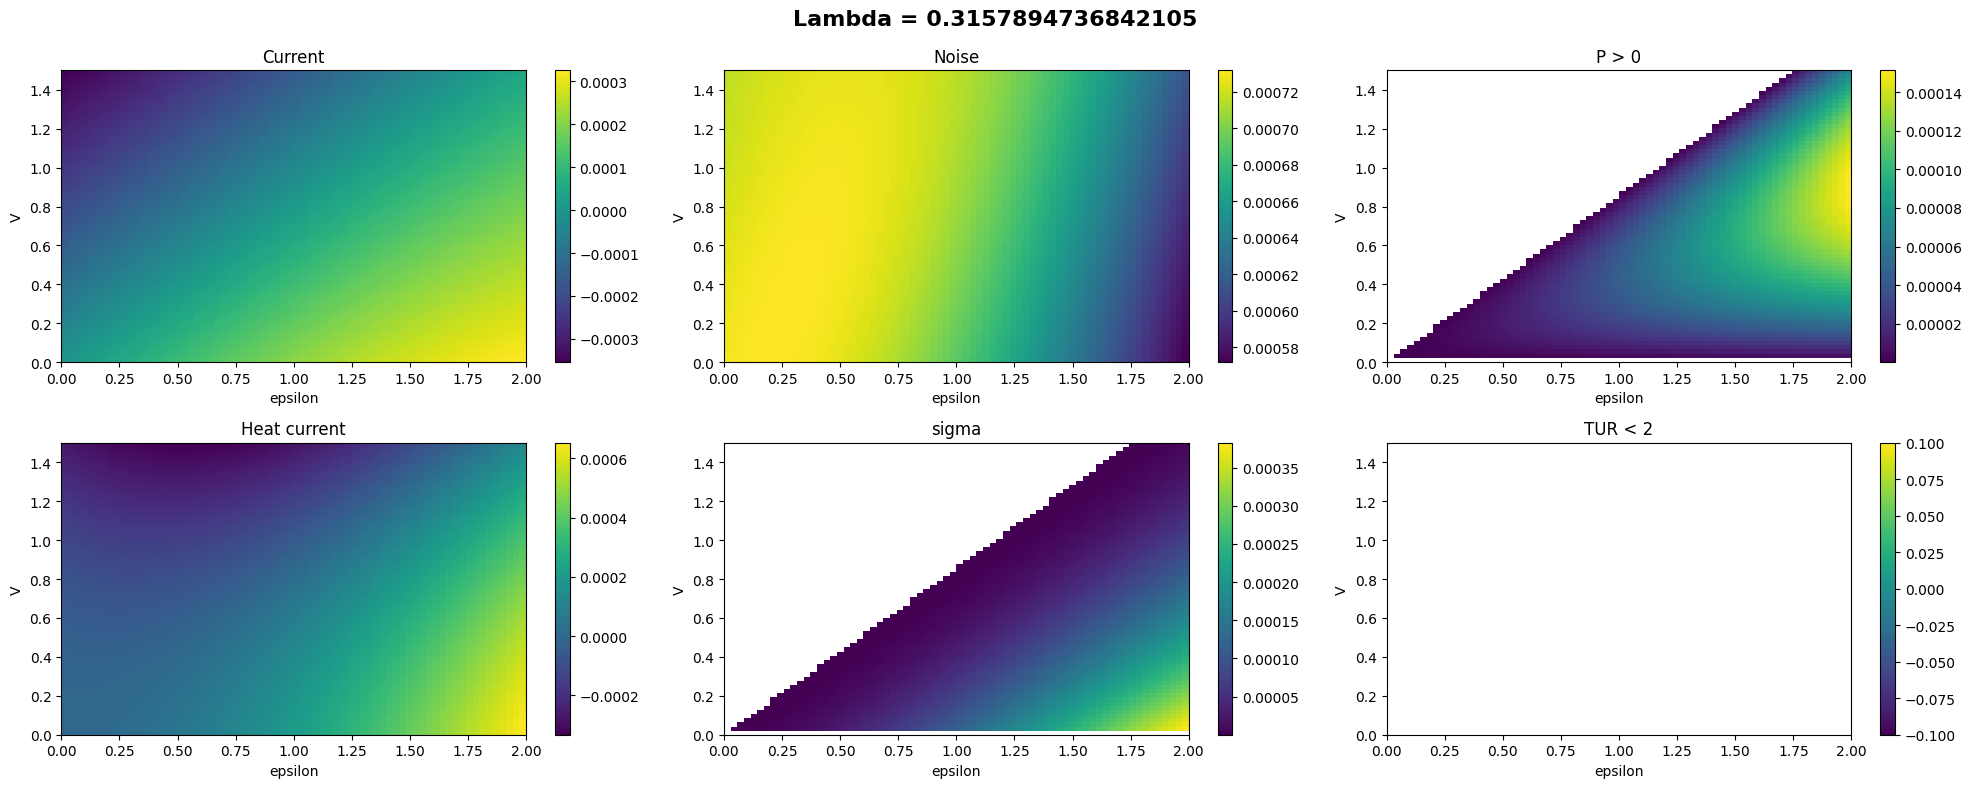

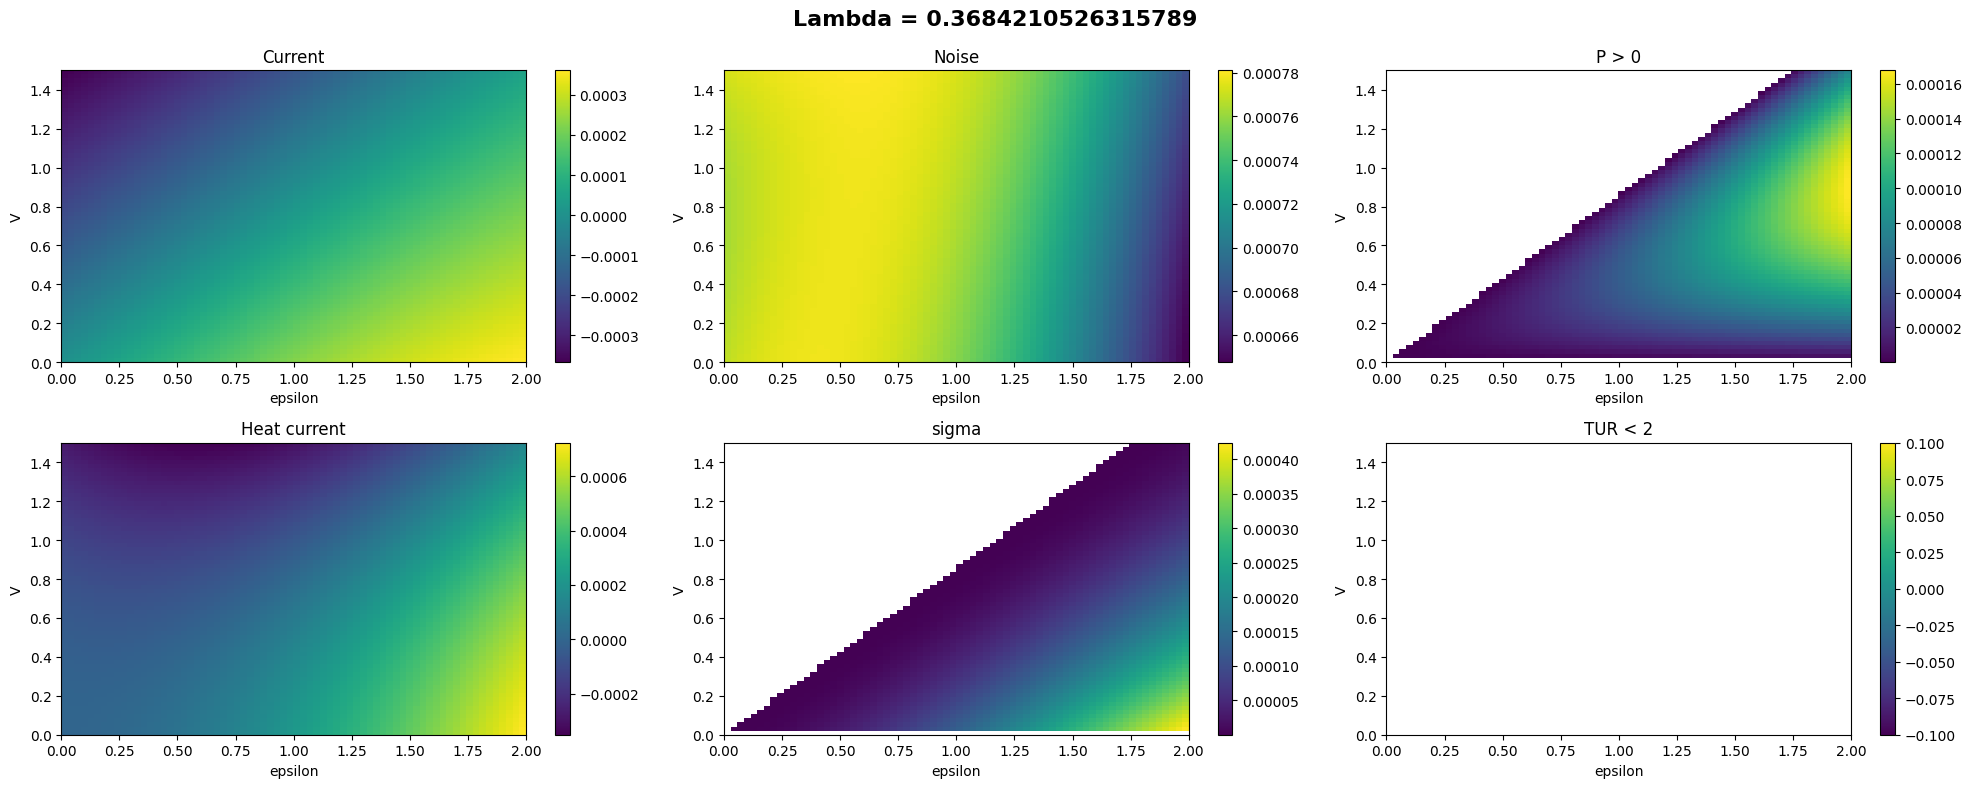

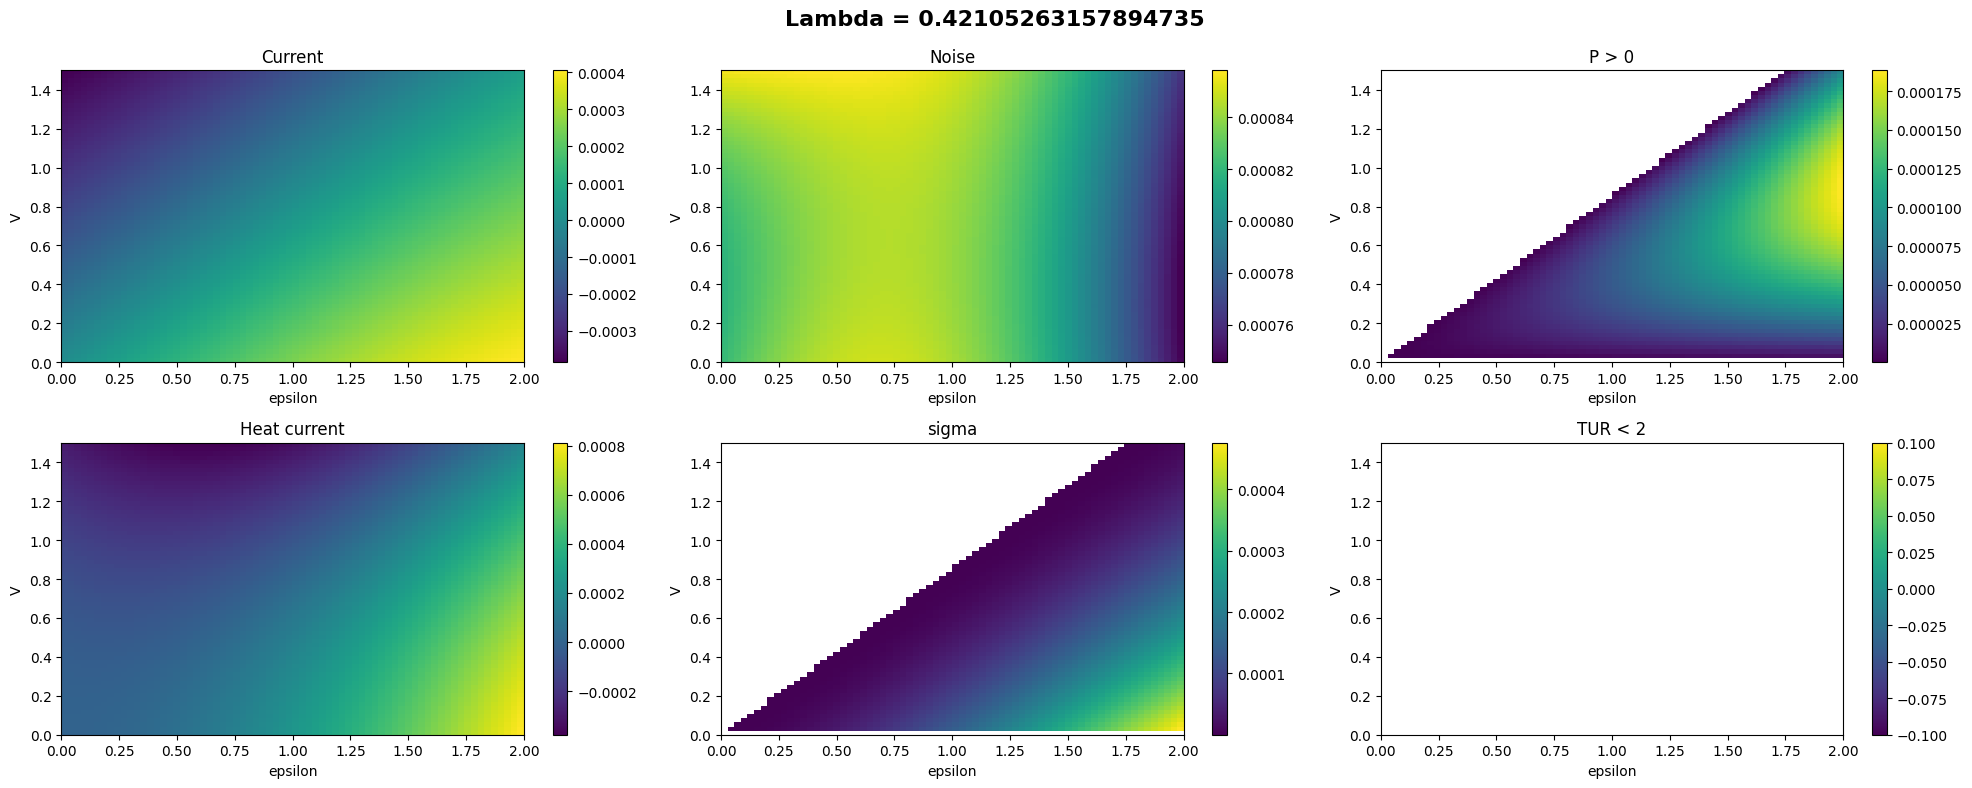

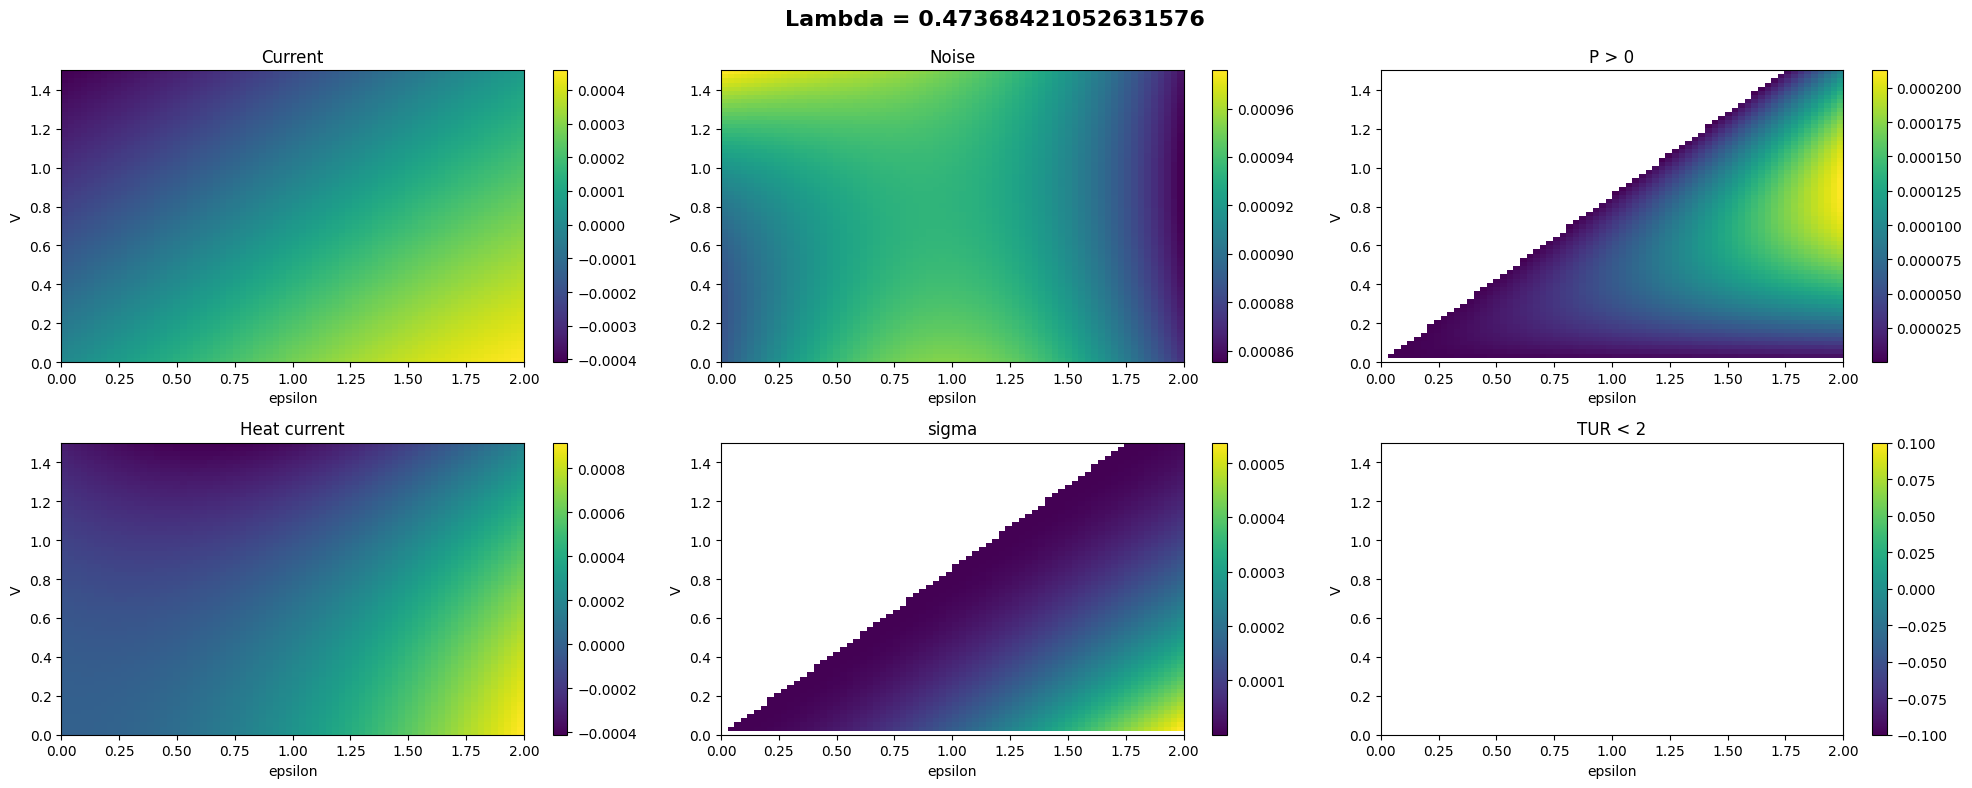

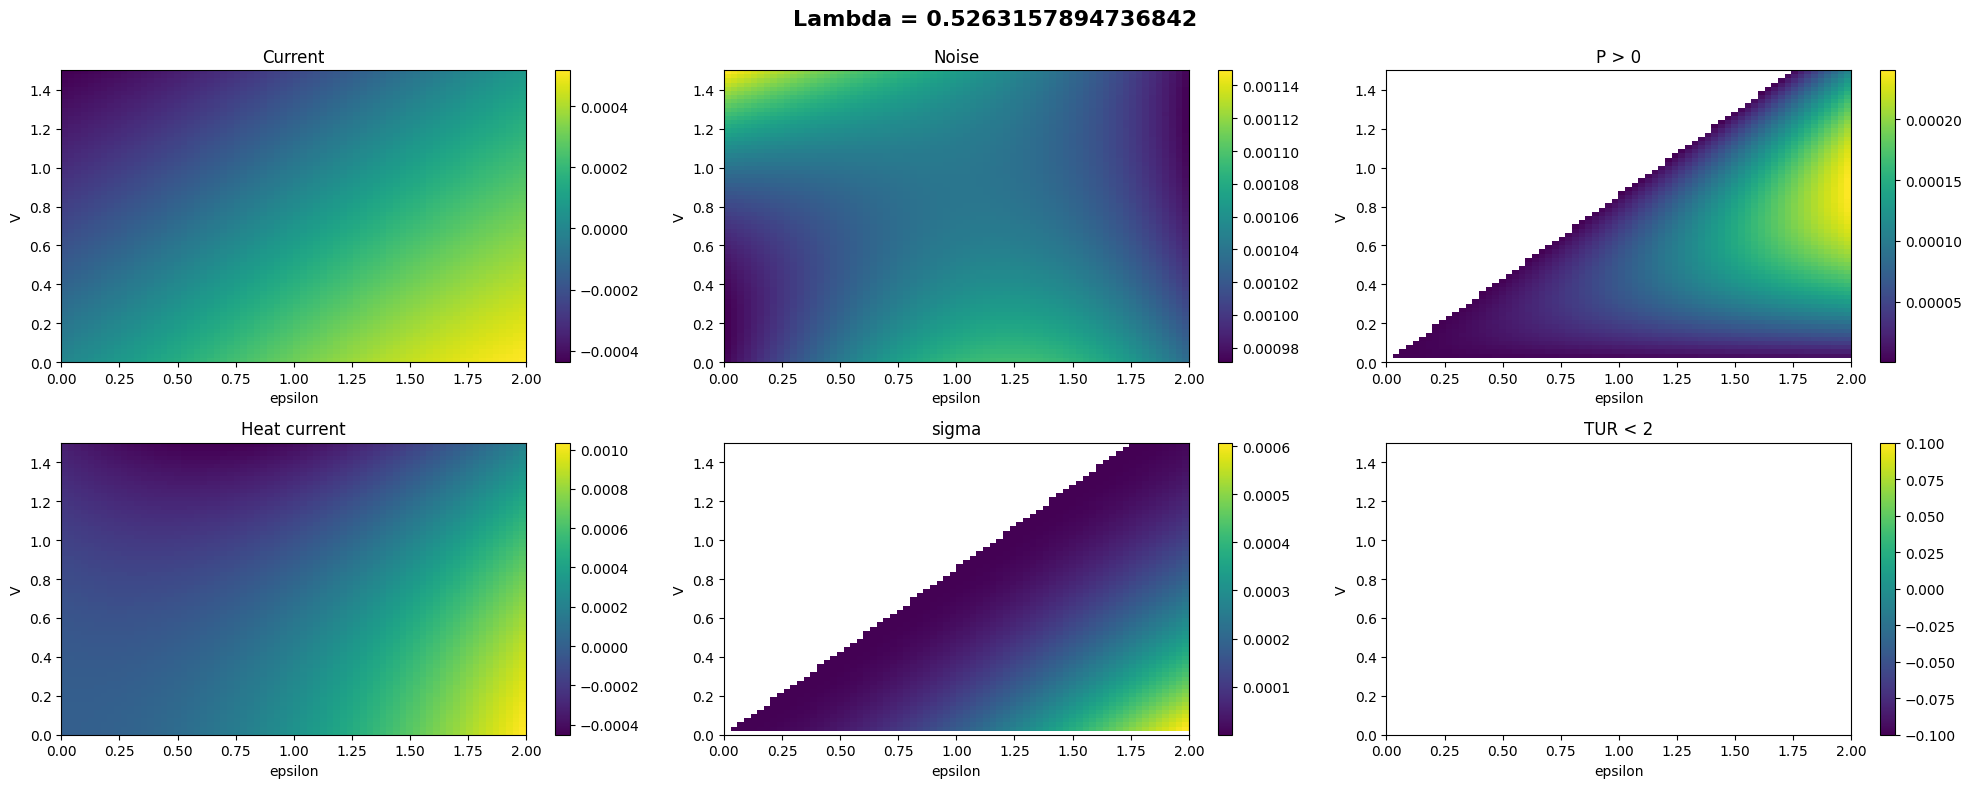

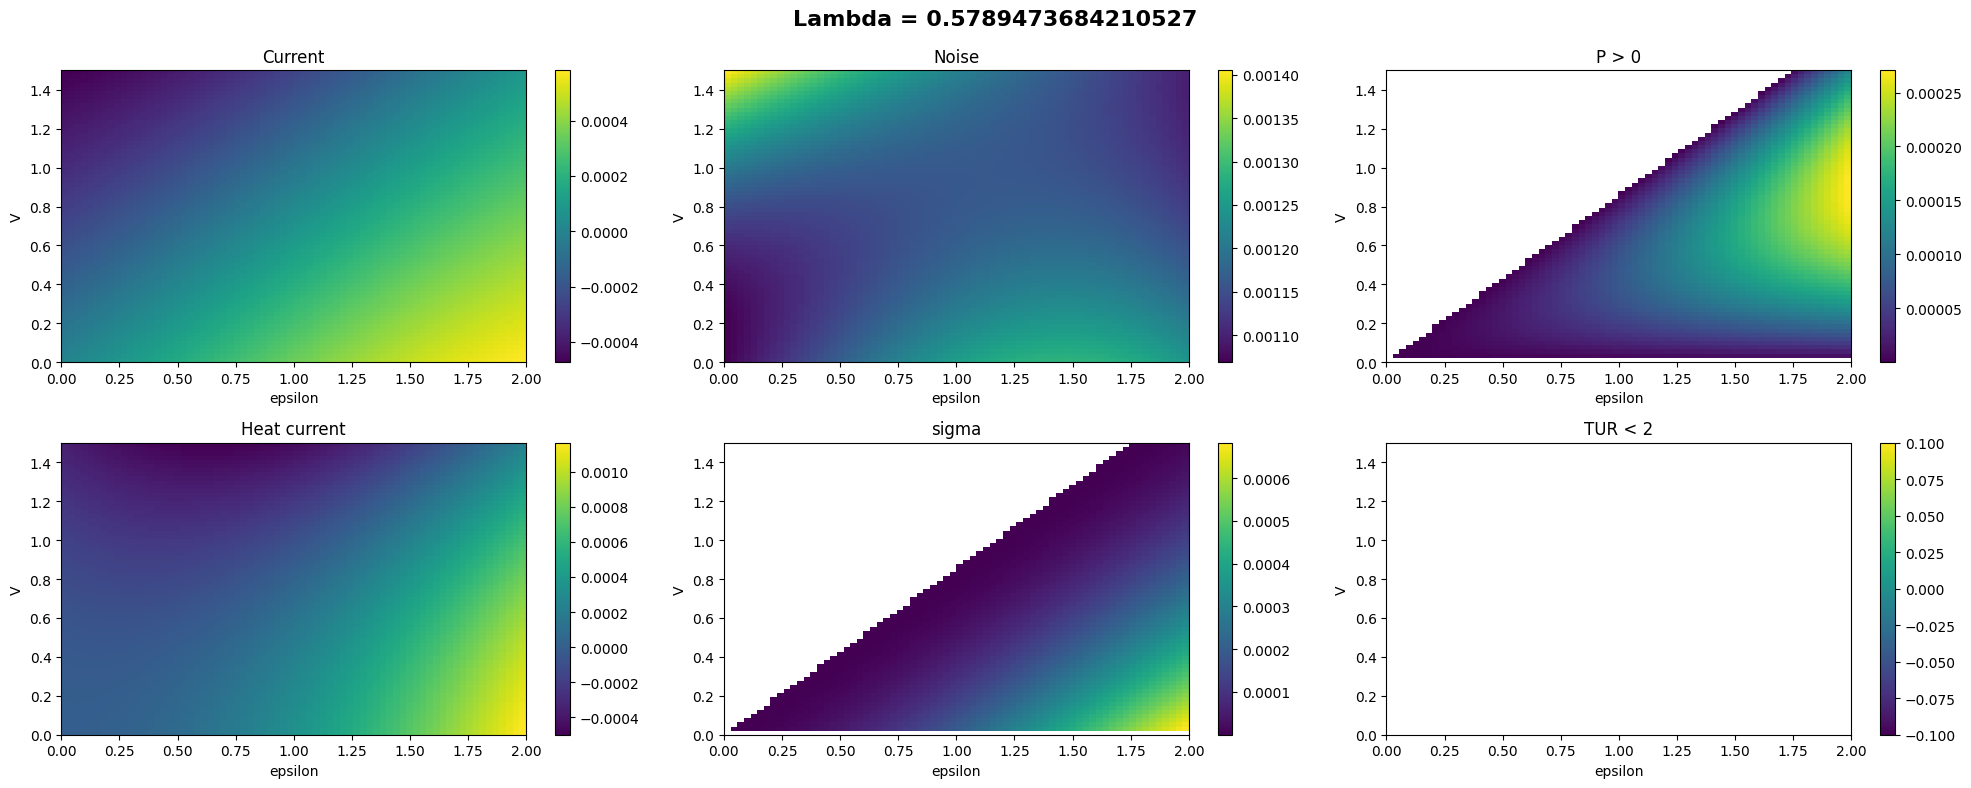

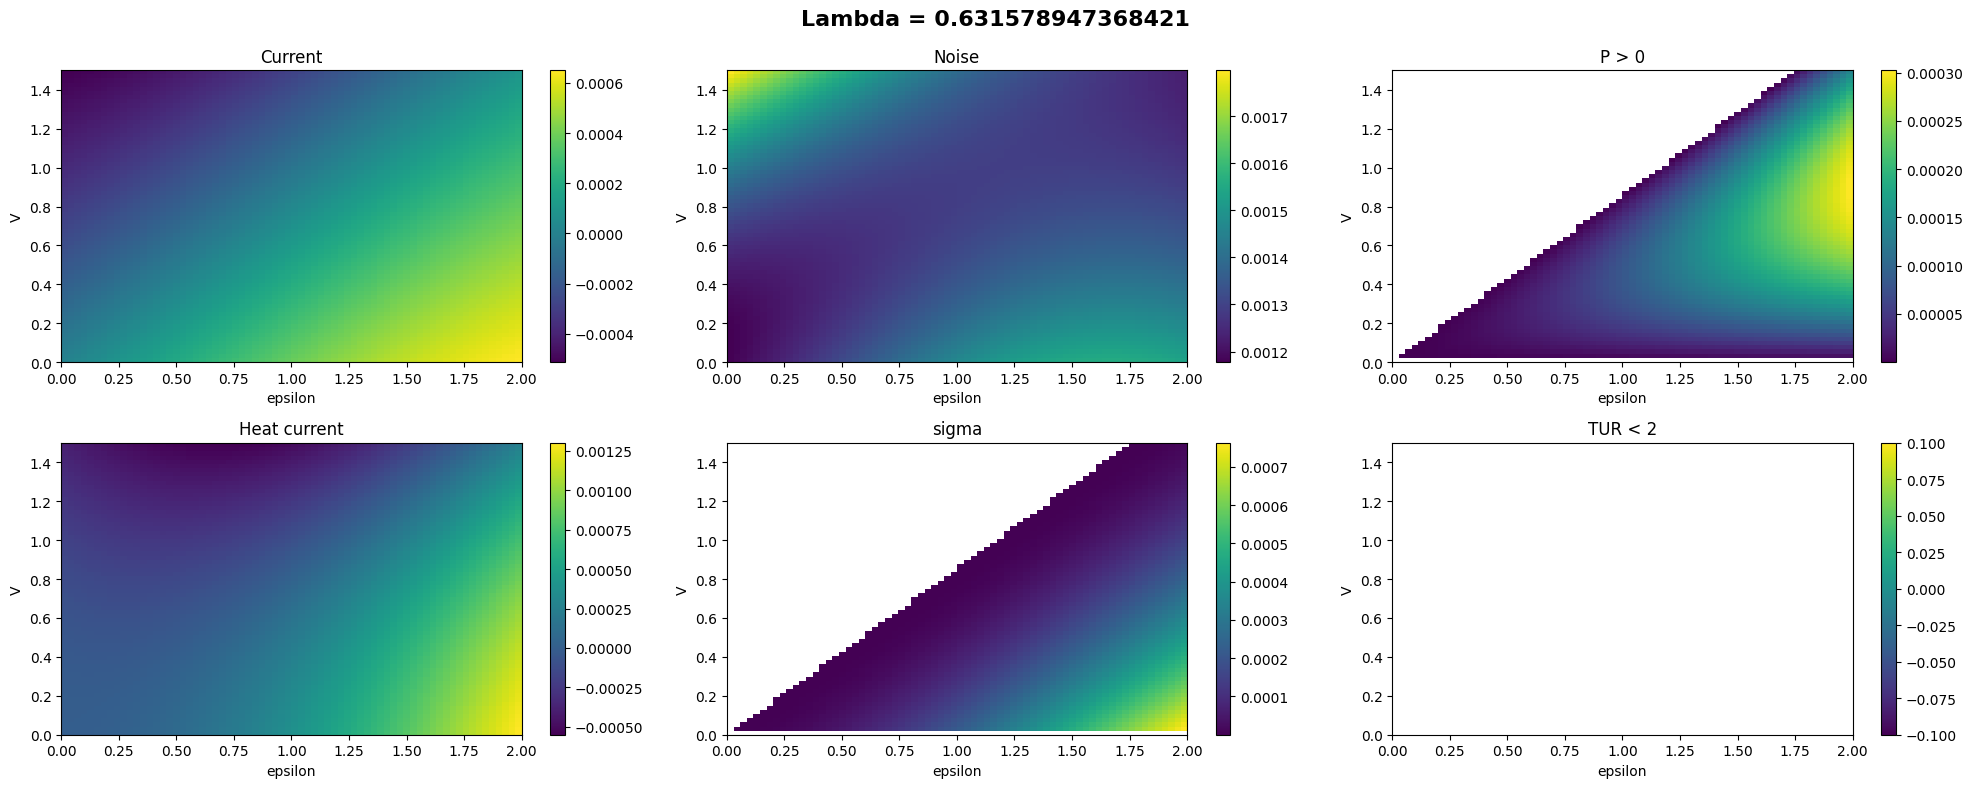

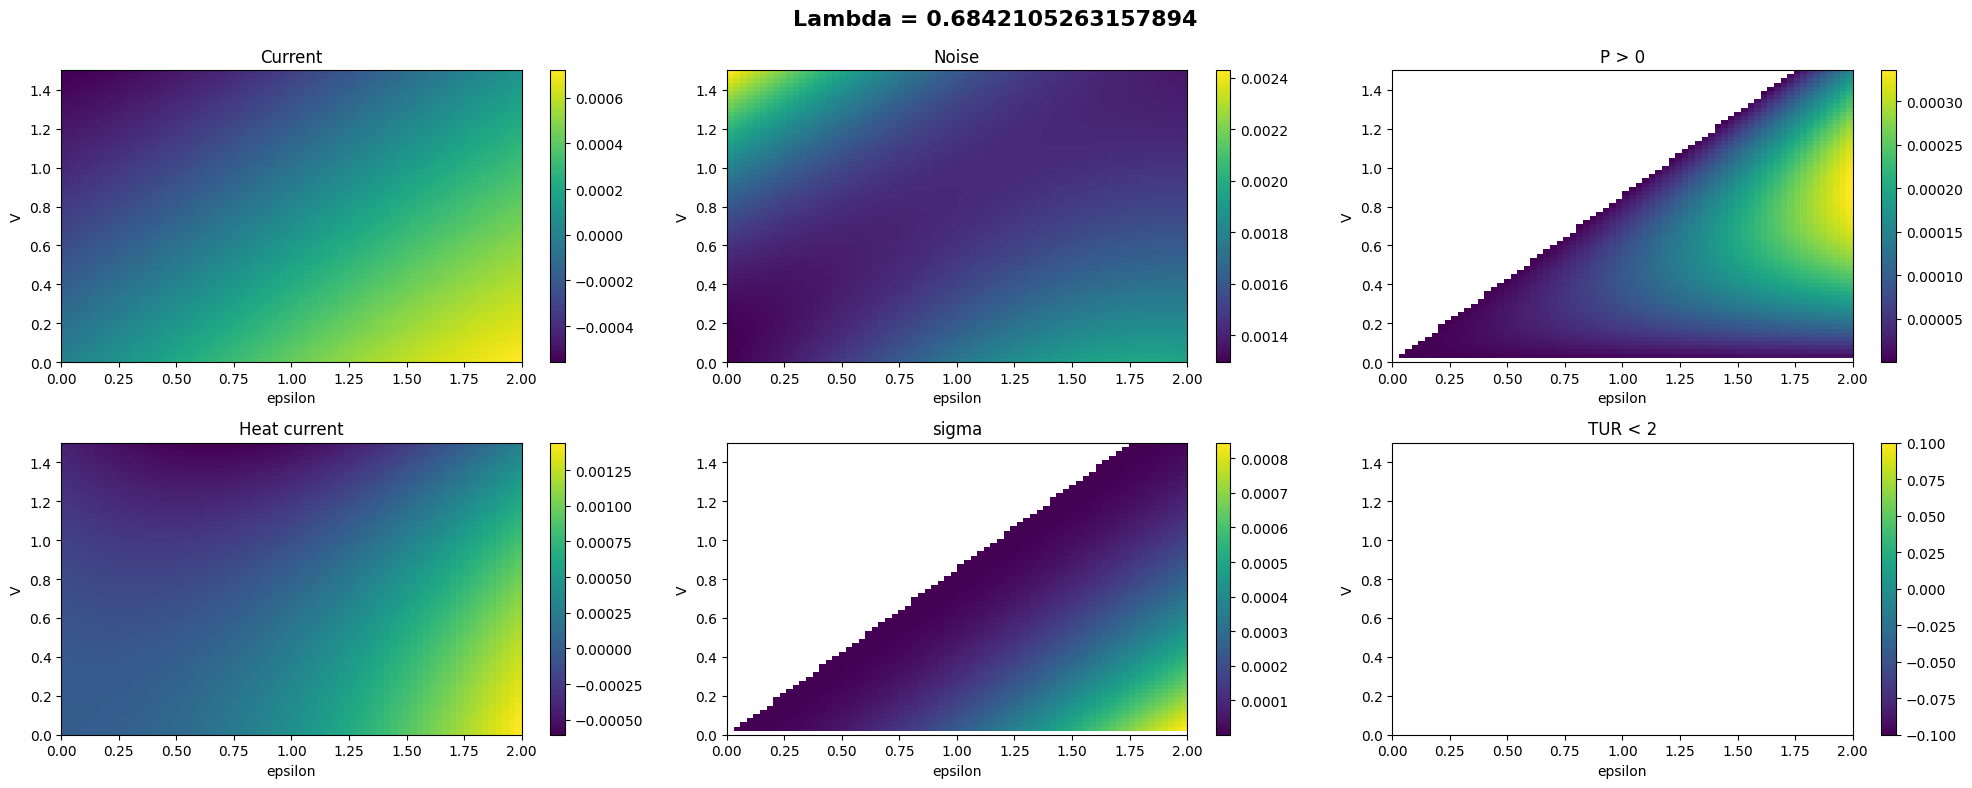

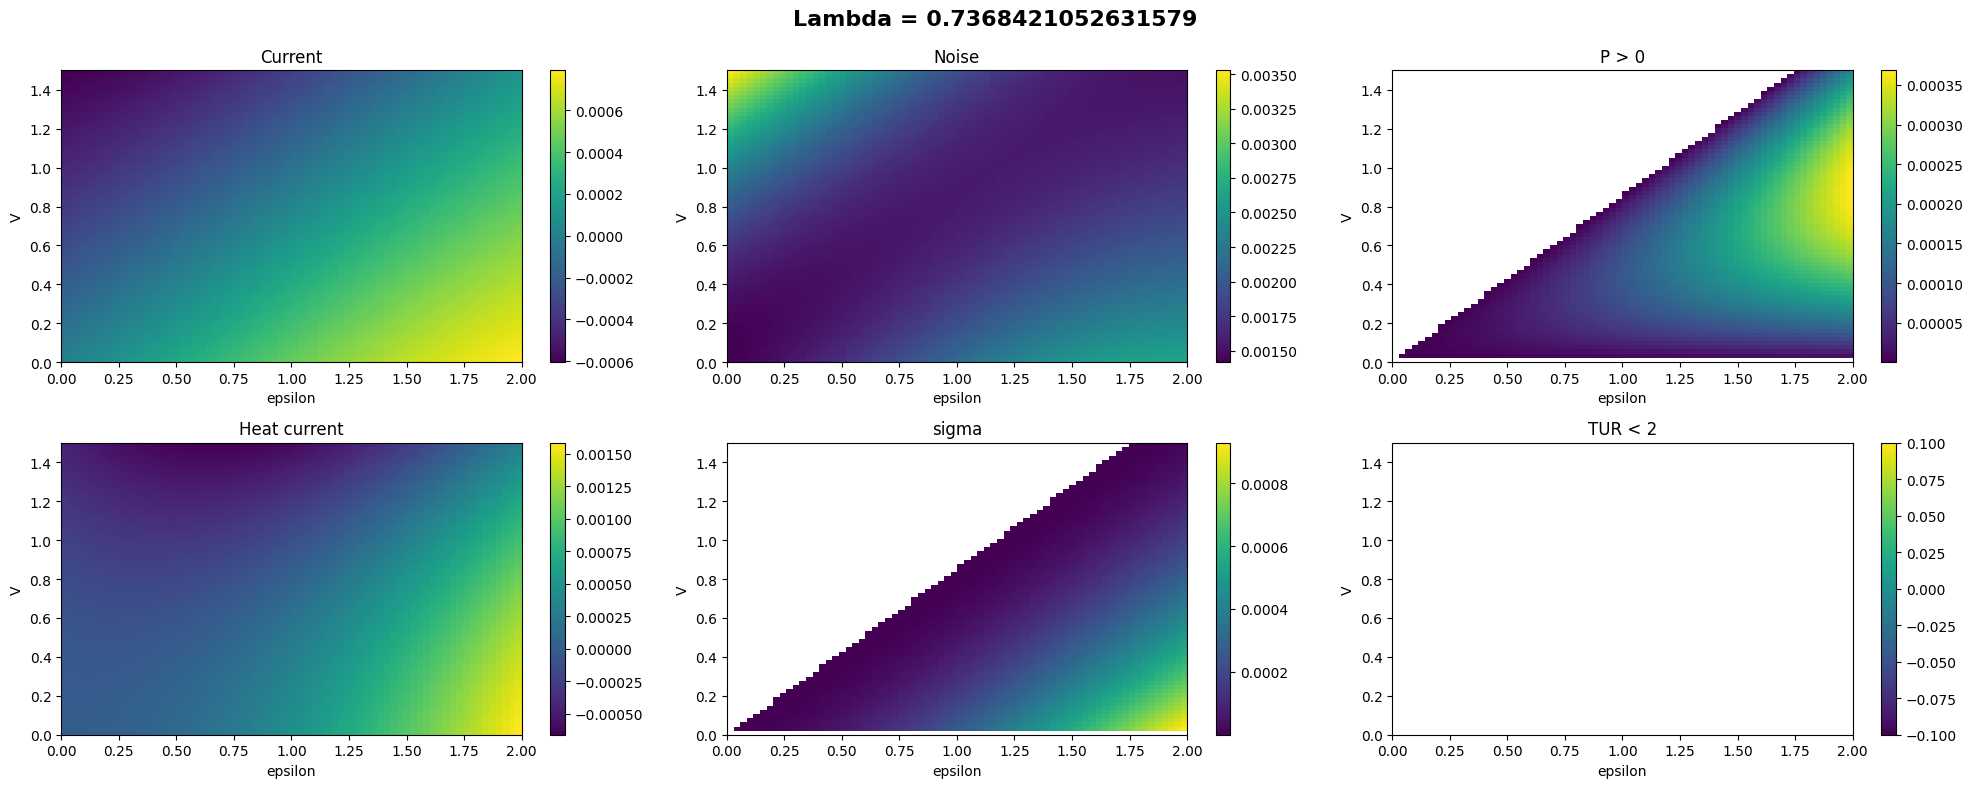

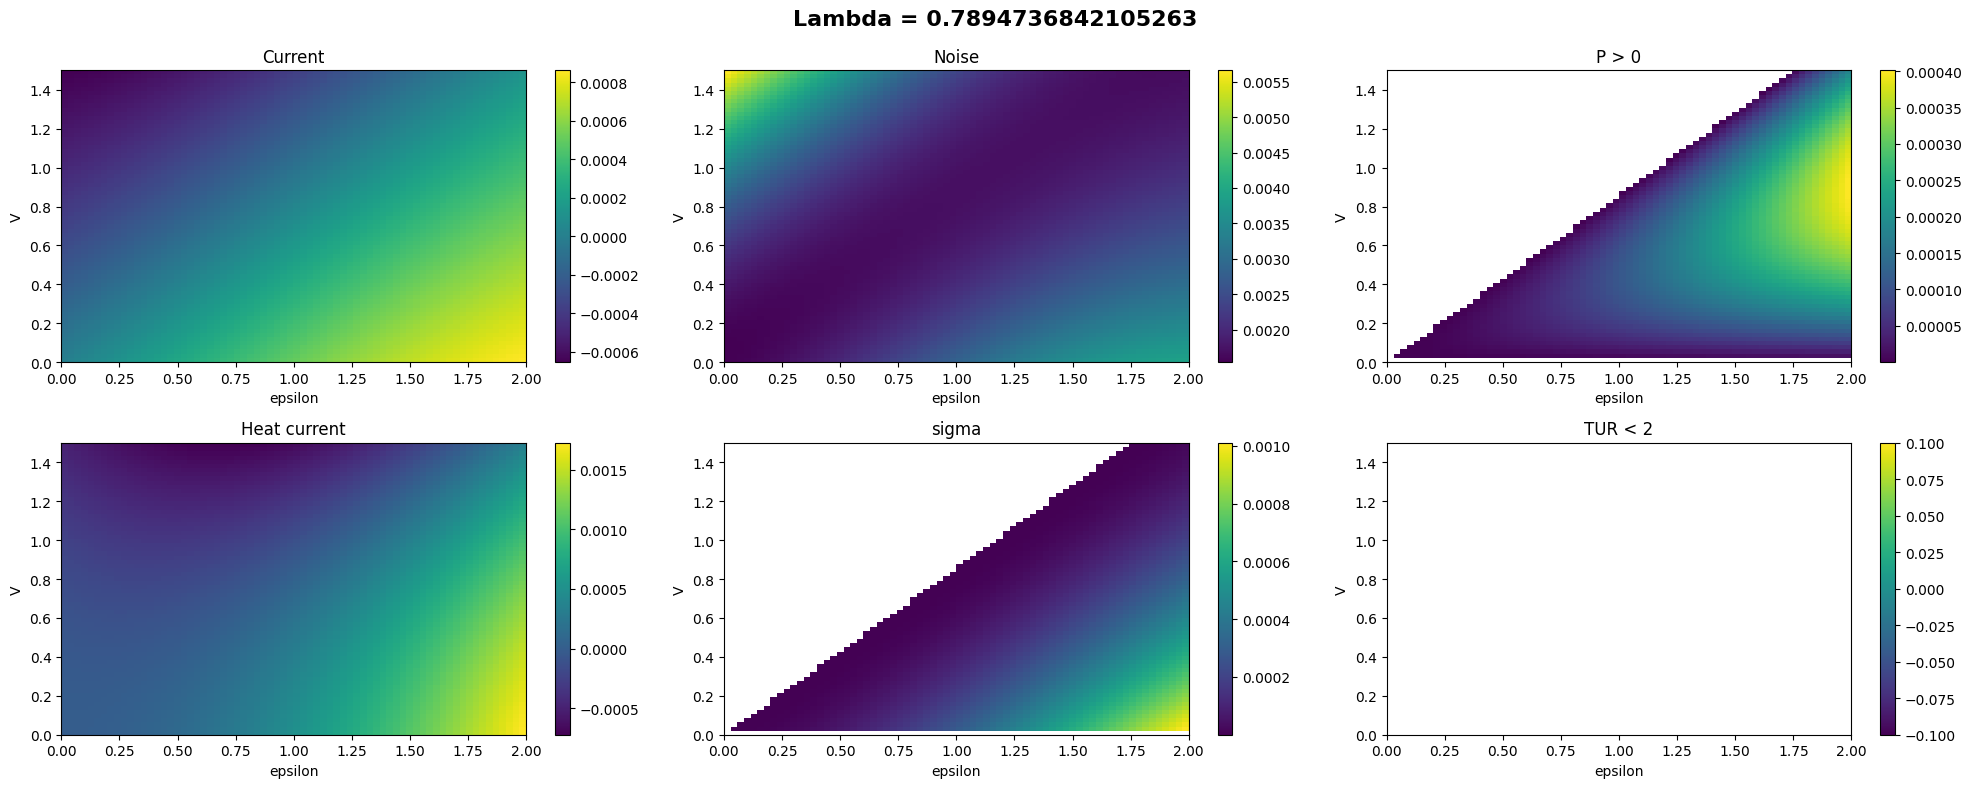

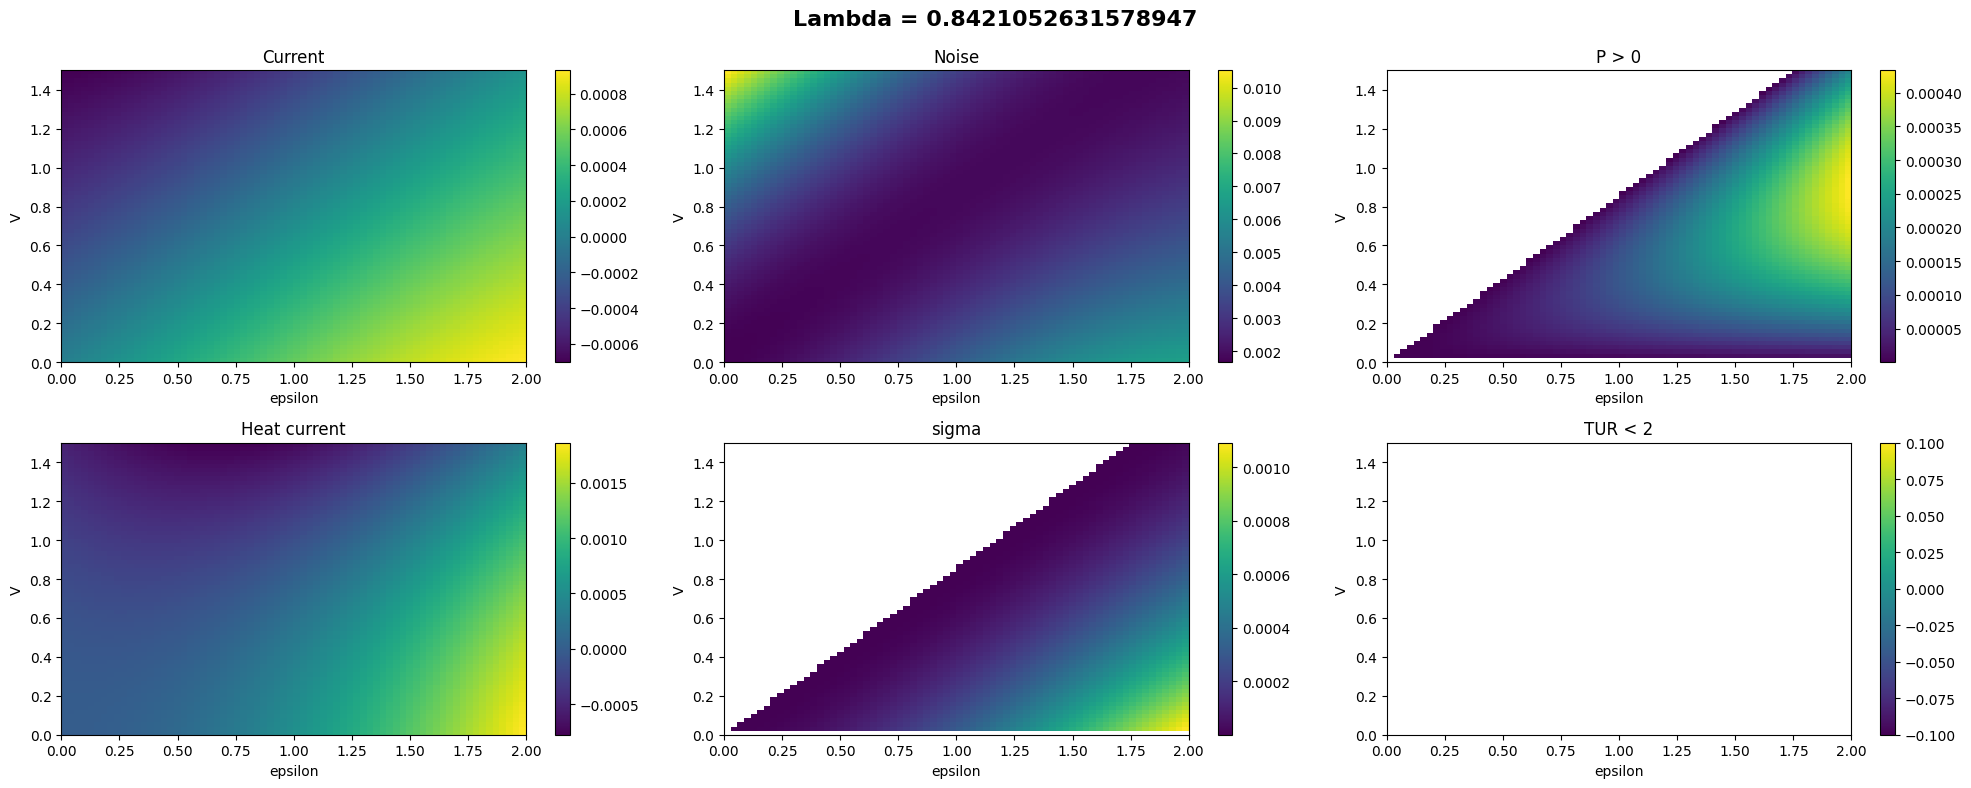

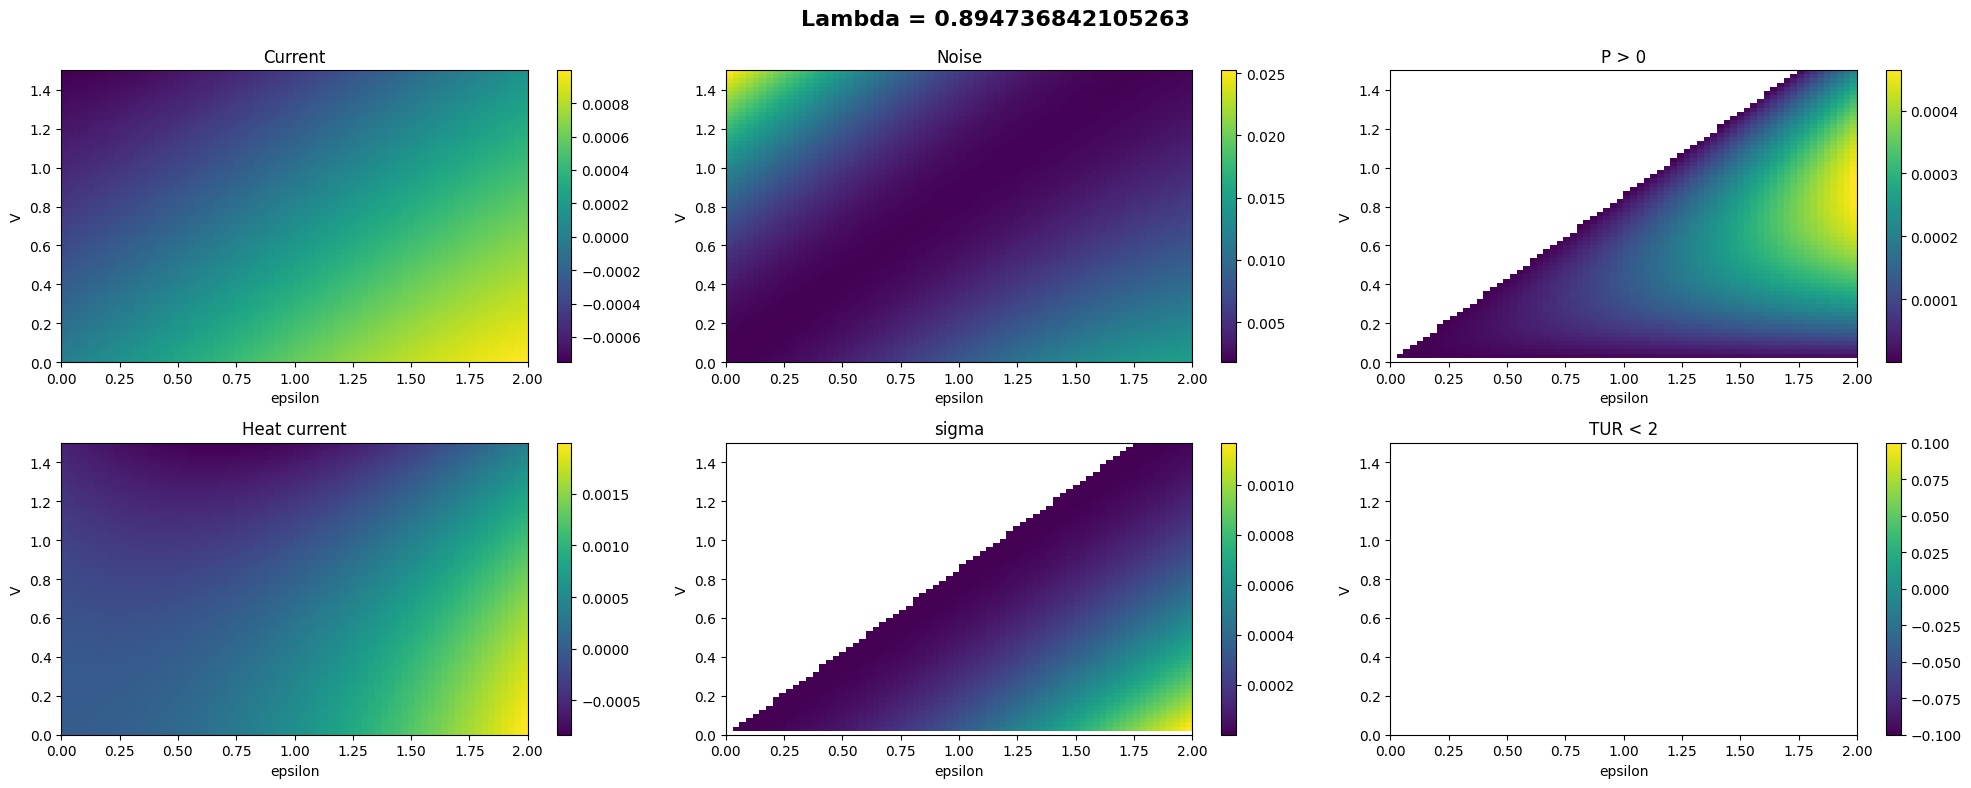

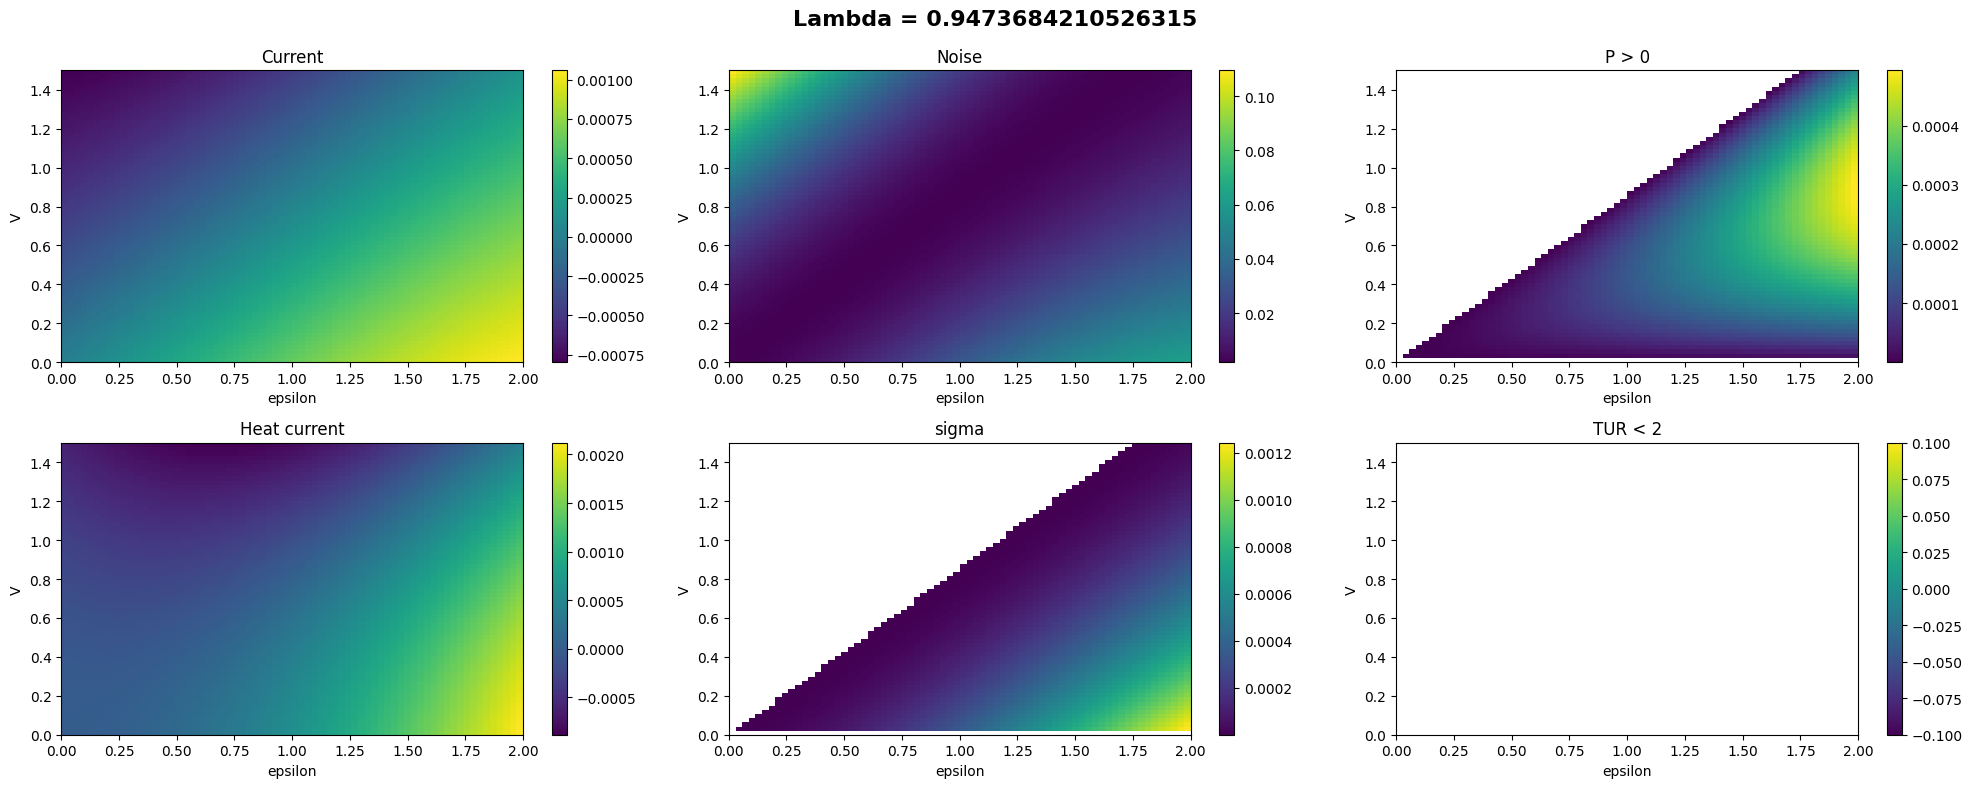

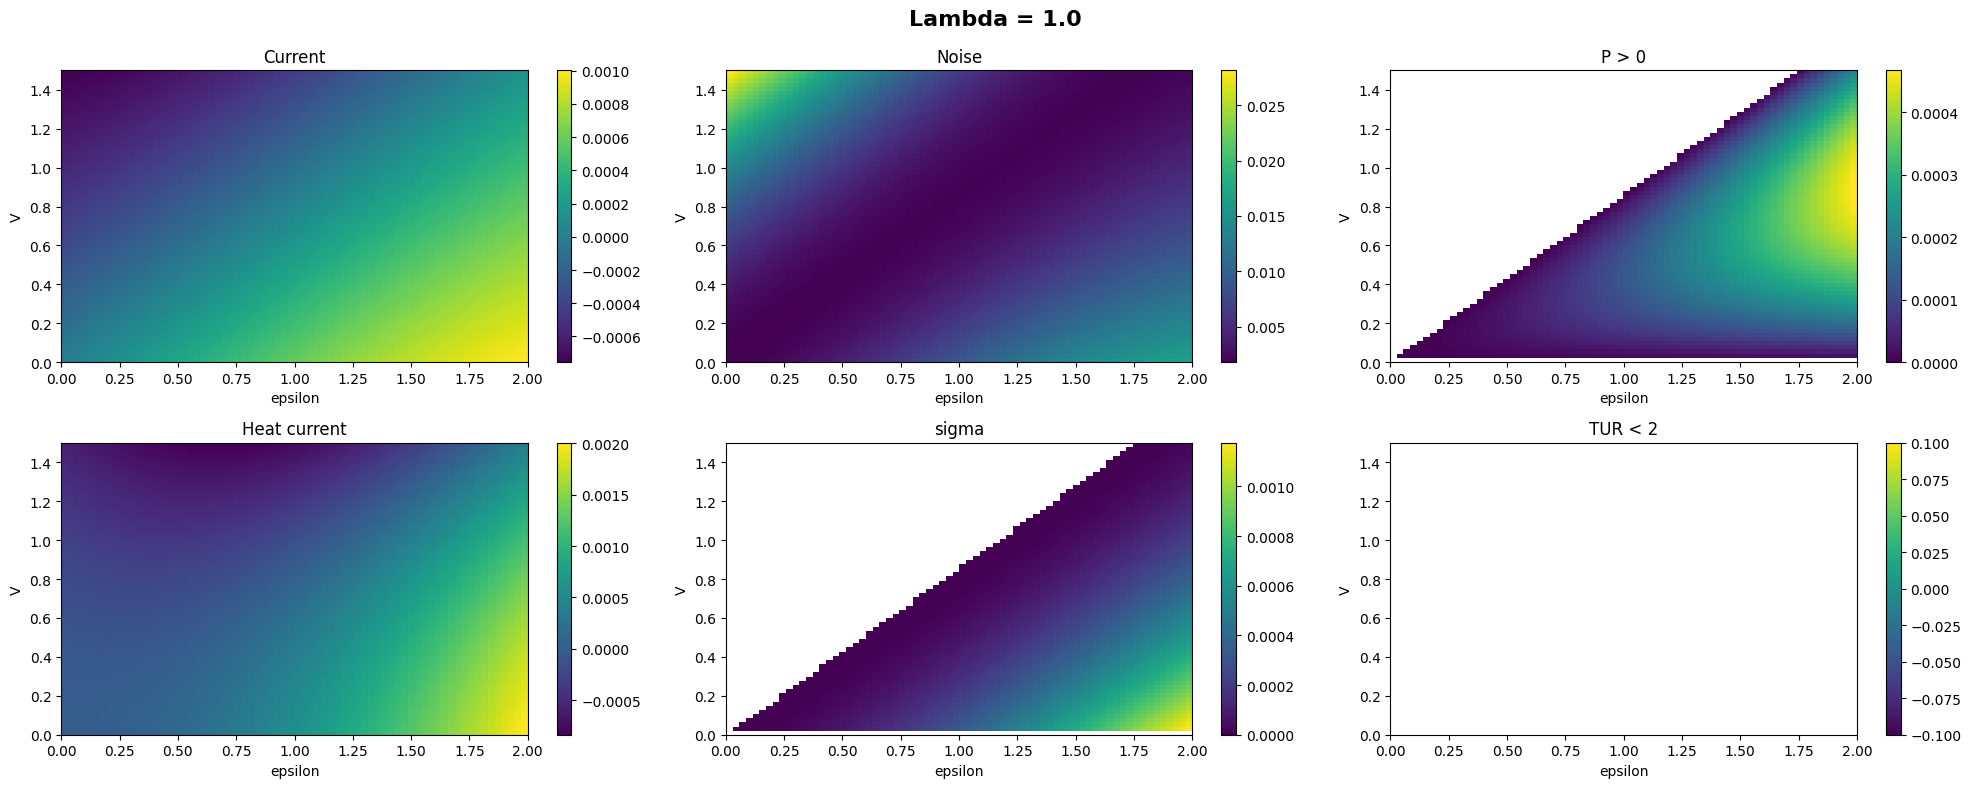

In [2]:
#--SETUP: ---------------------------------------------------------------------------------
VBs = np.linspace(0, 1.5, 70) # np.linspace(-10,10, 20)
epsilons = np.linspace(0, 2, 70) # np.linspace(-15, 15, 20)

T_L = 2.5 #100
T_R = 1 #T_L

INPUT = {
    'omega': 0.002, #1000
    'u_intra': 200, #2000
    'u_inter': 100, #1000
    'gammaL': 0.005, #0.5
    'gammaR': 0.005, #0.5
    'T_L': T_L,
    'T_R': T_R,
}

importlib.reload(vs)
importlib.reload(tc)
importlib.reload(pm)

Is = []
I_vars = []
J_QHs = []
Ps = []
TURs = []
effs = []
sigmas = []


lamdas = np.linspace(0, 1, 20)
for lmda in lamdas:
    I, I_var, J_QH, P = vs.run_lamda_sweep(VBs, epsilons, lmda, **INPUT)
    TUR, _, eff, sigma = tc.calculate_tur(T_L, T_R, I, I_var, J_QH, P)
    Is.append(I)
    I_vars.append(I_var)
    J_QHs.append(J_QH)
    Ps.append(P)
    TURs.append(TUR)
    effs.append(eff)
    sigmas.append(sigma)
    pm.plot_all(epsilons, VBs, I, I_var, P, J_QH, sigma, TUR, f"Lambda = {lmda}")

In [12]:
I_array = []
I_array_float = []
I_var_array = []
I_var_array_float = []
J_QH_array = []
J_QH_array_float = []
P_array = []
P_array_float = []
TUR_array_fixed = []
TUR_array_floating = []
eff_array = []
eff_array_float = []
sigma_array = []
sigma_array_float = []

min_epses = []
min_vbs = []

Epsilon, VB = np.meshgrid(epsilons, VBs)

TUR_temp = TURs[0]
min_TUR = np.nanmin(TUR_temp)
min_indices = np.argwhere(TUR_temp == min_TUR)
if len(min_indices) > 1:
    raise ValueError("More than one minimal value!")
min_x = min_indices[0][0]
min_y = min_indices[0][1]

#Fixed point
for idx, lmda in enumerate(lamdas):
    I = Is[idx]
    I_var = I_vars[idx]
    J_QH = J_QHs[idx]
    P = Ps[idx]
    TUR = TURs[idx]
    eff = effs[idx]
    sigma = sigmas[idx]
    #print("Min TUR: ", TUR[min_x, min_y])
    #print(f"\tat: epsilon: {Epsilon[min_x, min_y]} and VB: {VB[min_x, min_y]}")
    #print("\t Power here: ", P[min_x, min_y])
    I_array.append(I[min_x, min_y])
    I_var_array.append(I_var[min_x, min_y])
    J_QH_array.append(J_QH[min_x, min_y])
    P_array.append(P[min_x, min_y])
    TUR_array_fixed.append(TUR[min_x, min_y])
    eff_array.append(eff[min_x, min_y])
    sigma_array.append(sigma[min_x, min_y])

#Allways choosing the point with minimal TUR value
for idx, lmda in enumerate(lamdas):
    TUR = TURs[idx]
    min_TUR = np.nanmin(TUR)
    min_indices = np.argwhere(TUR == min_TUR)
    if len(min_indices) > 1:
        raise ValueError("More than one minimal value!")
    min_x = min_indices[0][0]
    min_y = min_indices[0][1]
    I_array_float.append(I[min_x, min_y])
    I_var_array_float.append(I_var[min_x, min_y])
    J_QH_array_float.append(J_QH[min_x, min_y])
    P_array_float.append(P[min_x, min_y])
    TUR_array_floating.append(min_TUR)
    eff_array_float.append(eff[min_x, min_y])
    sigma_array_float.append(sigma[min_x, min_y])
    min_epses.append(Epsilon[min_x, min_y])
    min_vbs.append(VB[min_x, min_y])



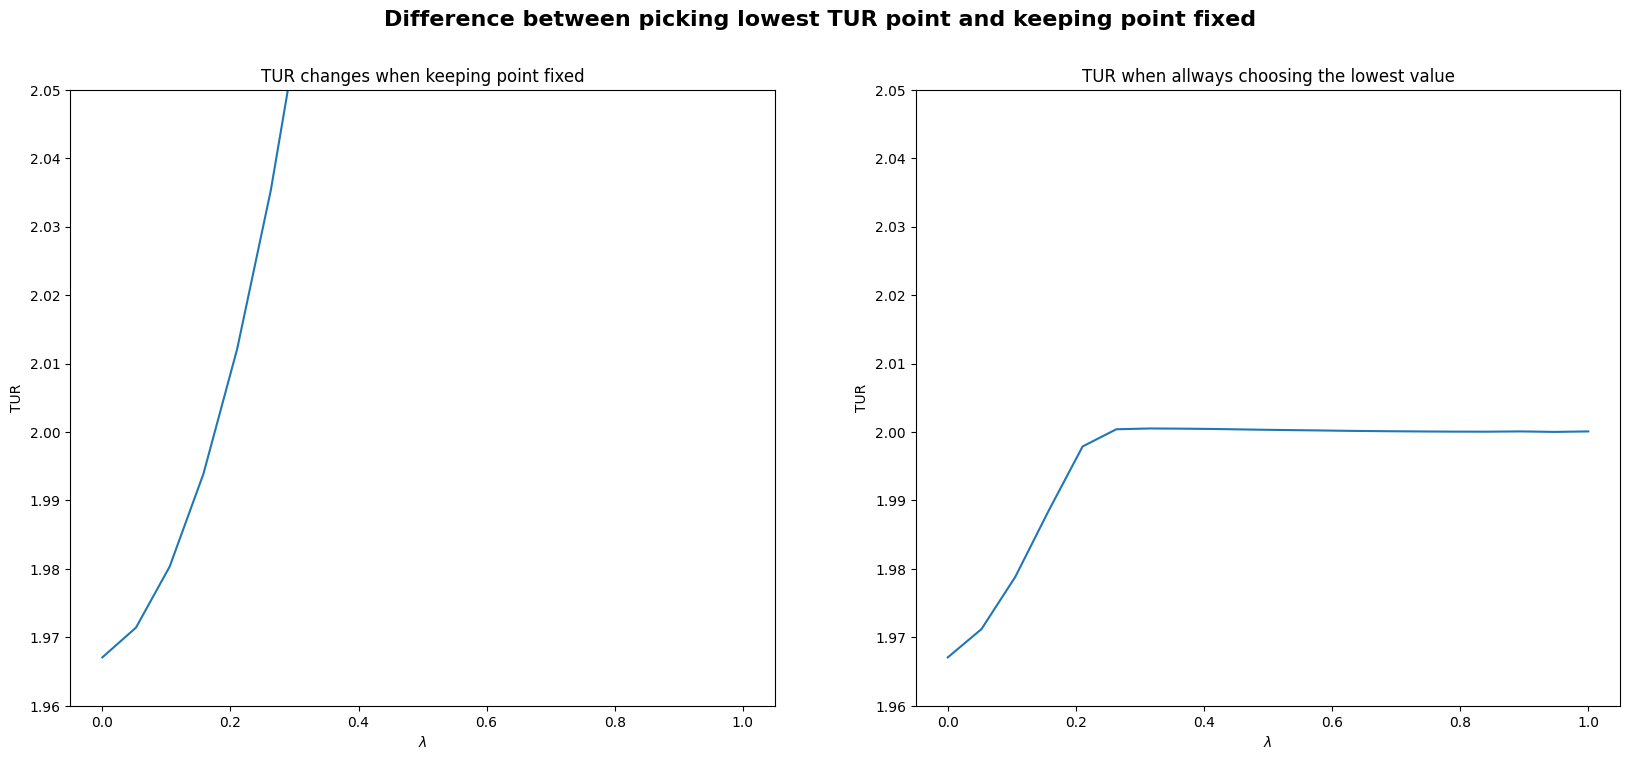

In [8]:
"ys should be list/tuple with two entrys and y_names containes the corresponding names"
importlib.reload(pm)
pm.plot_two(lamdas, r"$\lambda$", (TUR_array_fixed, TUR_array_floating),
            ("TUR", "TUR"),
             ("TUR changes when keeping point fixed", "TUR when allways choosing the lowest value"),
               "Difference between picking lowest TUR point and keeping point fixed")

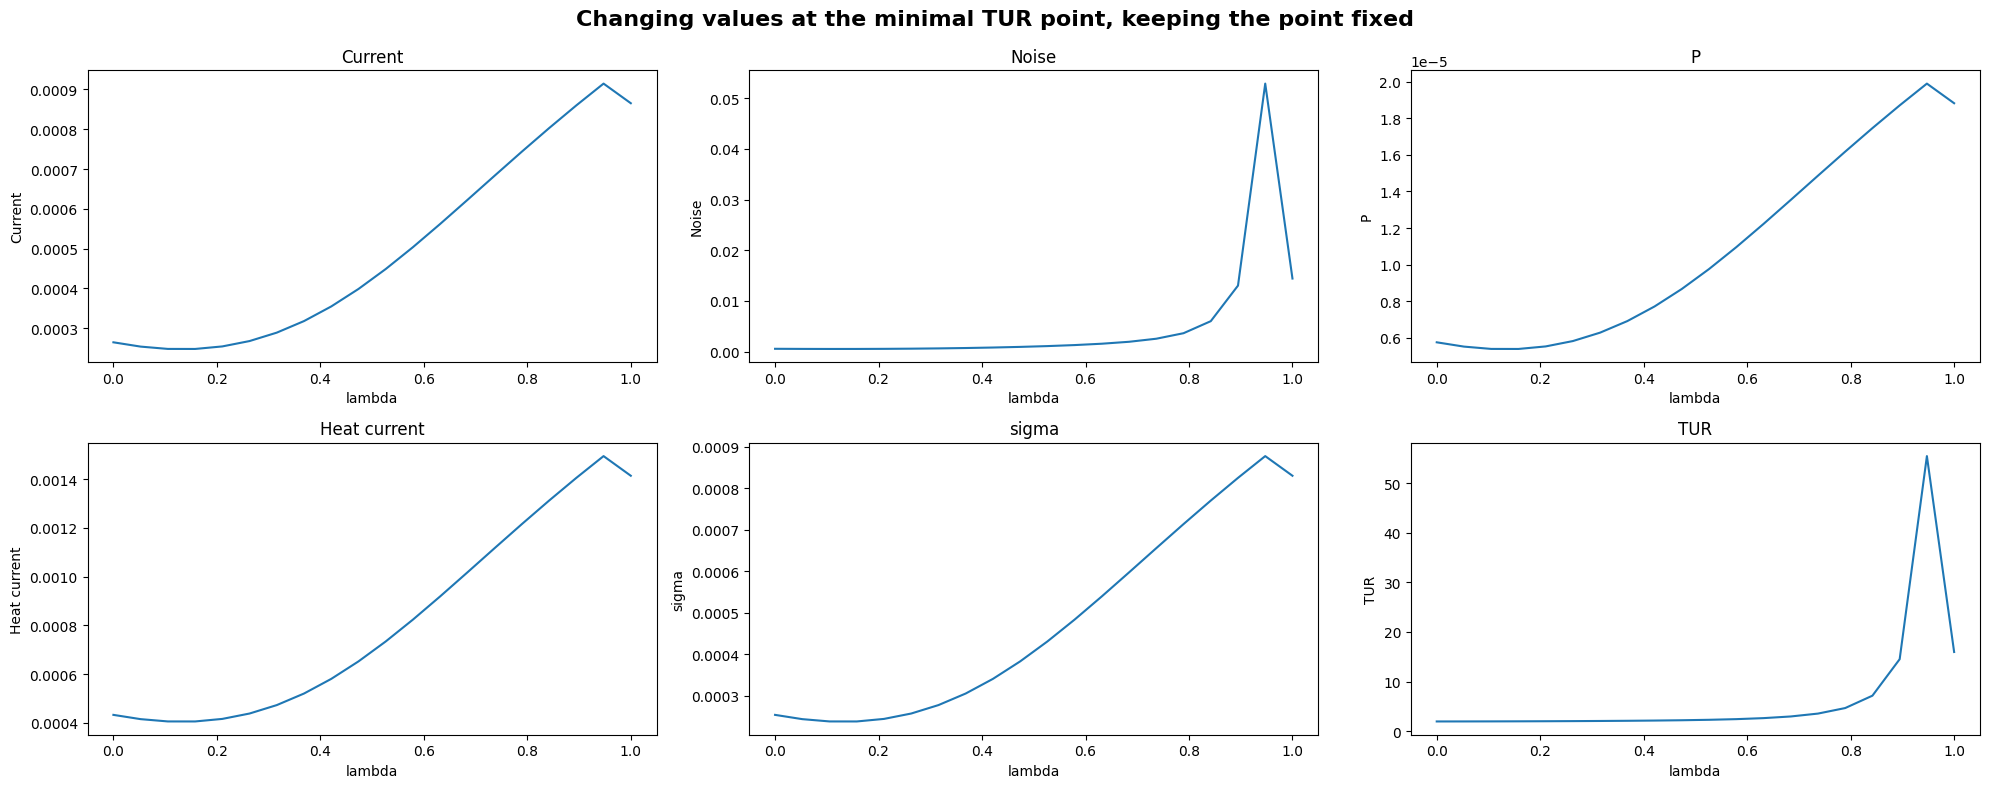

In [9]:
importlib.reload(pm)
pm.plot_inter(lamdas, I_array, I_var_array, P_array, J_QH_array, sigma_array, TUR_array_fixed,
               "Changing values at the minimal TUR point, keeping the point fixed")

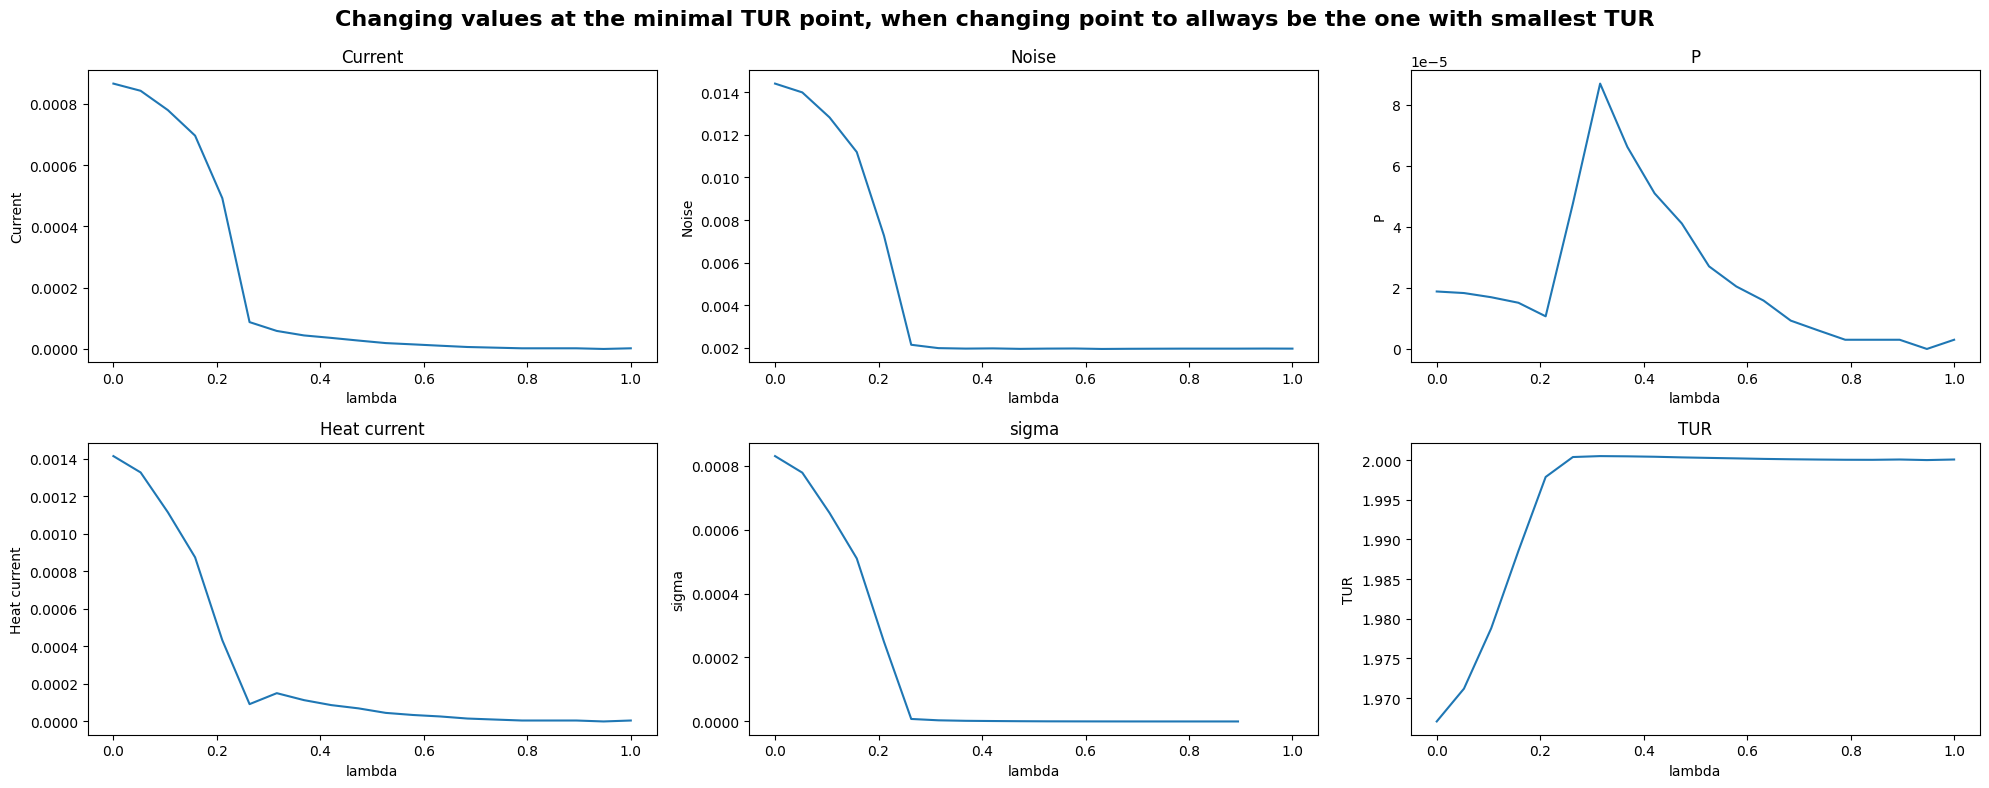

In [11]:
importlib.reload(pm)
pm.plot_inter(lamdas, I_array_float, I_var_array_float, P_array_float, J_QH_array_float, sigma_array_float, TUR_array_floating,
               "Changing values at the minimal TUR point, when changing point to allways be the one with smallest TUR")

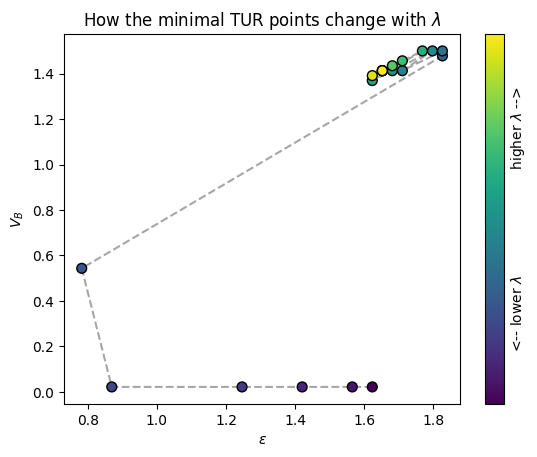

In [24]:
importlib.reload(pm)
pm.plot_minimal_TUR_points(min_epses, min_vbs)